<a href="https://colab.research.google.com/github/satyabratambb/loan_dashboard/blob/main/CPC_NOTEBOOK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv(r'C:\Users\91628\Downloads\CPC_94\assignment_files\CPC_training_set.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


DATA CLEANING

In [ ]:
for column in df.columns:
    print(f"{column}: {df[column].isnull().sum()} missing values")


Loan_ID: 0 missing values
Gender: 15 missing values
Married: 3 missing values
Dependents: 15 missing values
Education: 1 missing values
Self_Employed: 32 missing values
ApplicantIncome: 2 missing values
CoapplicantIncome: 1 missing values
LoanAmount: 22 missing values
Loan_Amount_Term: 14 missing values
Credit_History: 50 missing values
property_Area: 0 missing values
Loan_Status: 0 missing values


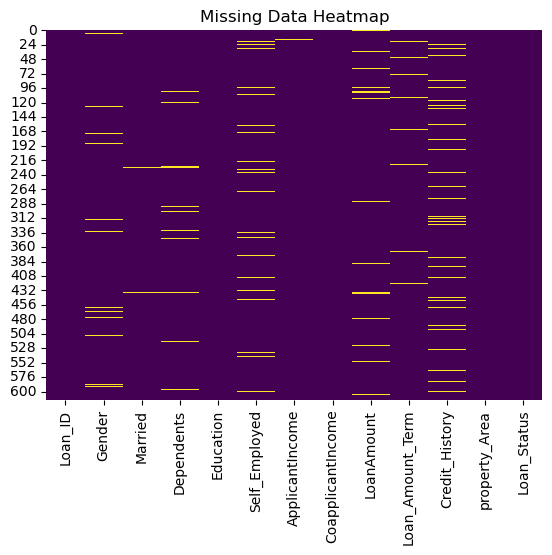

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the missing data using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


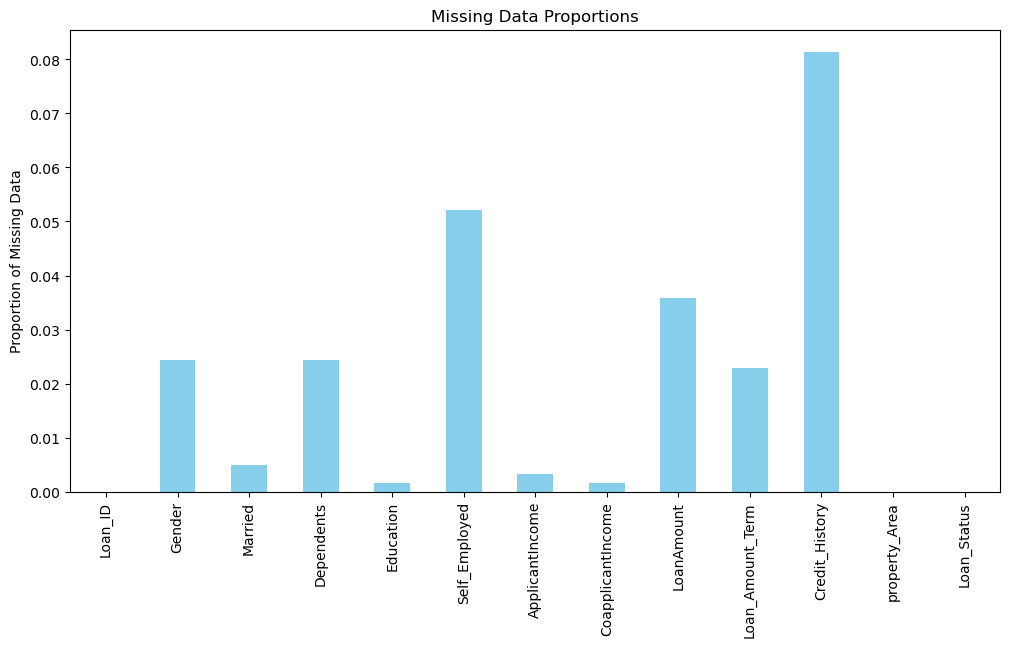

In [ ]:
# Calculate the proportion of missing values in each column
missing_data = df.isnull().mean()

# Plot missing data as a bar plot
missing_data.plot(kind='bar', figsize=(12, 6), color='skyblue', title='Missing Data Proportions')
plt.ylabel("Proportion of Missing Data")
plt.show()


In [ ]:
# Create a binary indicator for missing values in each column
missing_indicators = df.isnull().astype(int)

# Display the first few rows of missing indicators
missing_indicators.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


c:\Users\91628\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


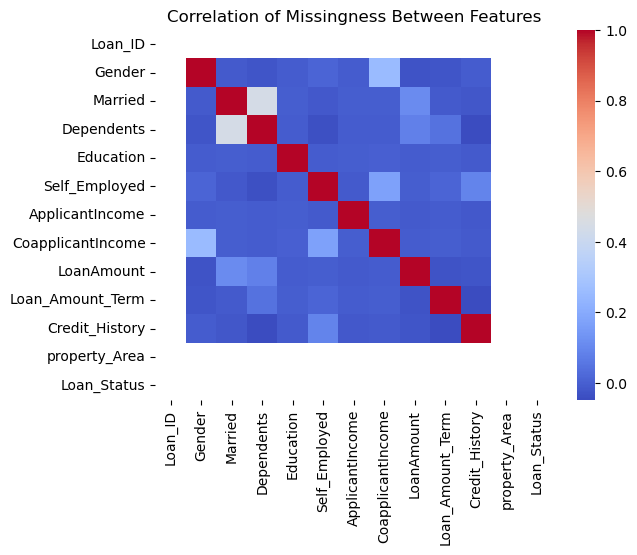

In [ ]:
# Calculate the correlation matrix between missingness indicators
missing_corr = missing_indicators.corr()

# Plot the correlation heatmap
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation of Missingness Between Features")
plt.show()


WORKING ON GENDER

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table for missingness in LoanAmount and Credit_History
contingency = pd.crosstab(df['Gender'].isnull(), df['CoapplicantIncome'])

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f'Chi-Square statistic: {chi2}, p-value: {p}')


Chi-Square statistic: 282.84074124063386, p-value: 0.5250072008994225


This implies that the missing values in the Gender column are not related to the missing values in the CoapplicantIncome column, and hence the missing data is likely Missing Completely at Random (MCAR). In this case, you could handle the missing values in both columns separately without worrying about a relationship between their missingness patterns.

In [ ]:
df['Gender'].value_counts()

Gender
Male      487
Female    112
Name: count, dtype: int64

In [ ]:
pip install -U scikit-learn


  Using cached scikit_learn-1.6.0-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.6.0-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


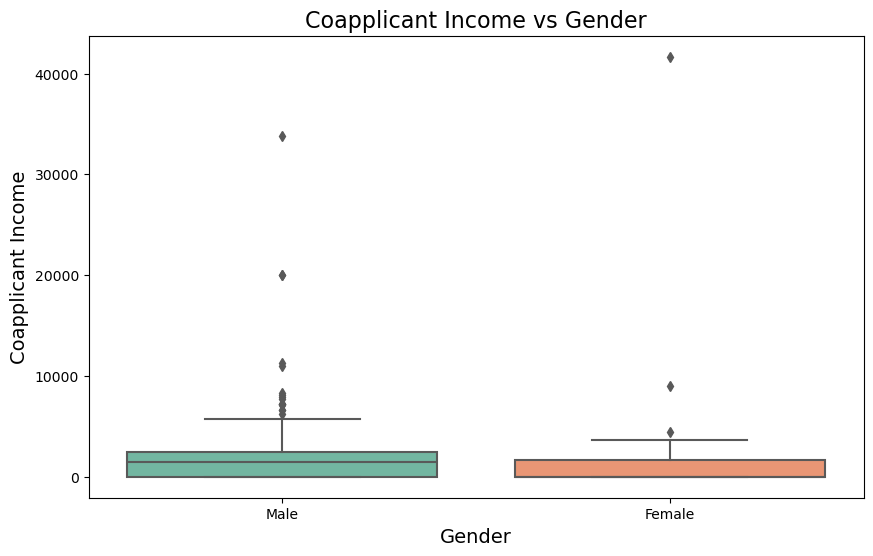

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the relationship between CoapplicantIncome and Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='CoapplicantIncome', palette='Set2')

# Adding labels and title
plt.title('Coapplicant Income vs Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Coapplicant Income', fontsize=14)
plt.show()



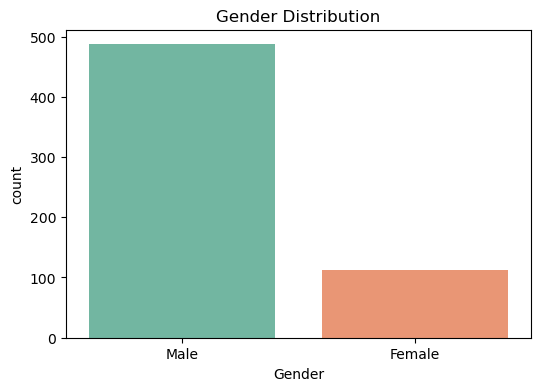

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of 'Gender'
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')
plt.show()


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Calculate the proportions of Male and Female in the Gender column
gender_proportions = df['Gender'].value_counts(normalize=True)
print("Gender Proportions:")
print(gender_proportions)


Gender Proportions:
Gender
Male      0.813022
Female    0.186978
Name: proportion, dtype: float64


In [ ]:
missing_gender_count=df['Gender'].isnull().sum()

gender_values=np.random.choice(gender_proportions.index,size=missing_gender_count,p=gender_proportions.values)
df.loc[df['Gender'].isnull(),'Gender']=gender_values
missing_gender_after=df['Gender'].isnull().sum()

Imputing Missing Values in the Gender Column
In this step, we handle the missing values in the Gender column, which is a categorical variable. Missing data can skew the analysis and lead to biased results, so it’s essential to properly impute these values.

Imputation Method:
Two common strategies for imputing missing values in categorical columns are:

Mode Imputation: This method replaces missing values with the most frequent category (mode). While this is a simple and fast approach, it may not always preserve the natural distribution of the data, especially when there is a significant class imbalance.

Proportional Distribution Imputation: This method imputes missing values based on the observed distribution of the existing categories. By preserving the proportions of the classes (e.g., 80% Male, 20% Female), this method ensures that imputed values are consistent with the real-world distribution of the data. This approach is more robust in scenarios where there is an imbalance in the categorical data.

Chosen Approach:
For this dataset, we opted to impute missing values based on the existing distribution of the Gender column. This approach ensures that the imputed values follow the same proportions as observed in the original data, thus preserving the balance of the categories (Male and Female). We used the np.random.choice function to randomly assign the missing values according to the calculated proportions.

In [ ]:
df['Married'].isnull().value_counts()

Married
False    611
True       3
Name: count, dtype: int64

In [ ]:
df['Gender'].isnull().value_counts()

Gender
False    614
Name: count, dtype: int64

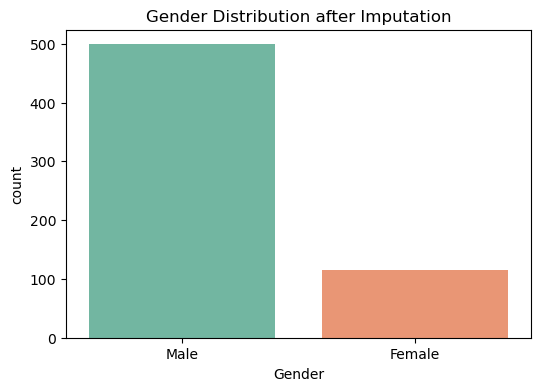

In [ ]:
# Plot the distribution of 'Gender'
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution after Imputation')
plt.show()

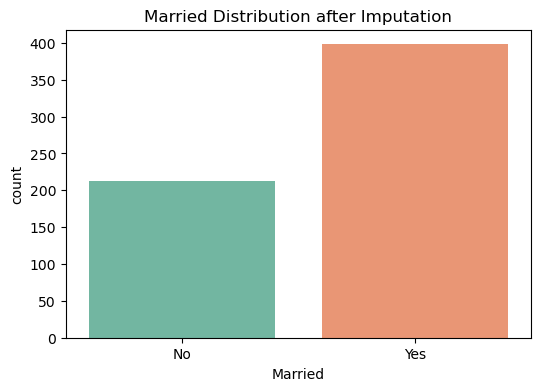

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Married', data=df, palette='Set2')
plt.title('Married Distribution after Imputation')
plt.show()

Step: Imputing Missing Values in the Married Column
In this step, we address the missing values in the Married column, which is a categorical variable indicating whether the applicant is married ("Yes" or "No").

Imputation Method:
We use Mode Imputation, where missing values are replaced by the most frequent category (mode). This approach is particularly suitable when the number of missing values is small, as is the case with the Married column in our dataset. Since the number of missing values is minimal, imputing with the mode ensures that the missing data does not have a significant impact on the analysis.

Chosen Approach:
For the Married column, the most frequent value is "Yes". Therefore, we chose to impute all missing values with the "Yes" label.

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df['Dependents'].isnull().value_counts()

Dependents
False    599
True      15
Name: count, dtype: int64

In [ ]:
df['Married']=df['Married'].fillna('Yes')

In [ ]:
df['Married'].isnull().value_counts()

Married
False    614
Name: count, dtype: int64

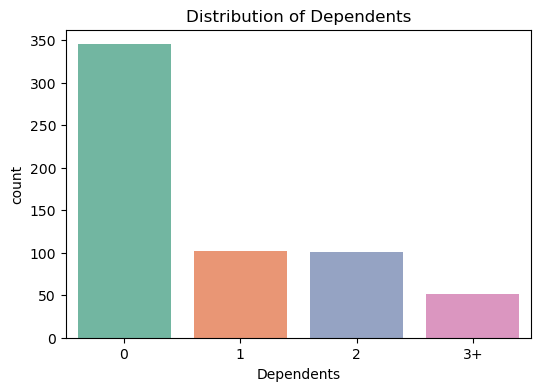

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Dependents', data=df, palette='Set2')
plt.title('Distribution of Dependents')
plt.show()

c:\Users\91628\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


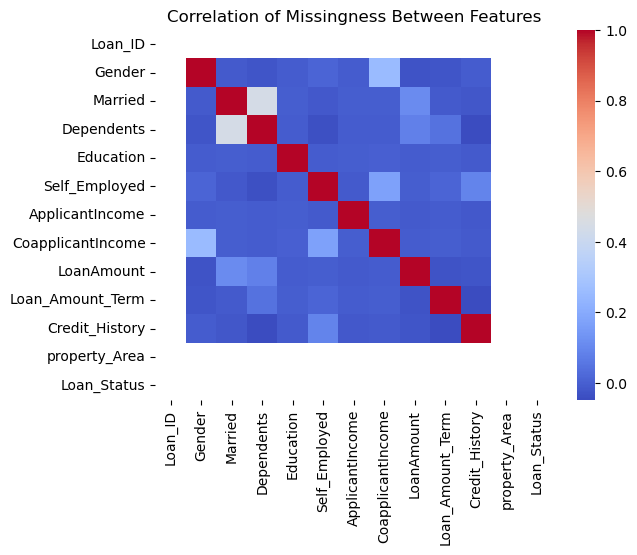

In [ ]:
# Calculate the correlation matrix between missingness indicators
missing_corr = missing_indicators.corr()

# Plot the correlation heatmap
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation of Missingness Between Features")
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table for missingness in LoanAmount and Credit_History
contingency = pd.crosstab(df['Dependents'].isnull(), df['CoapplicantIncome'])

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f'Chi-Square statistic: {chi2}, p-value: {p}')


Chi-Square statistic: 189.9393570754775, p-value: 0.9999967369933906


Dependents    0   1   2  3+
Married                    
No          171  23   8   7
Yes         174  79  93  44


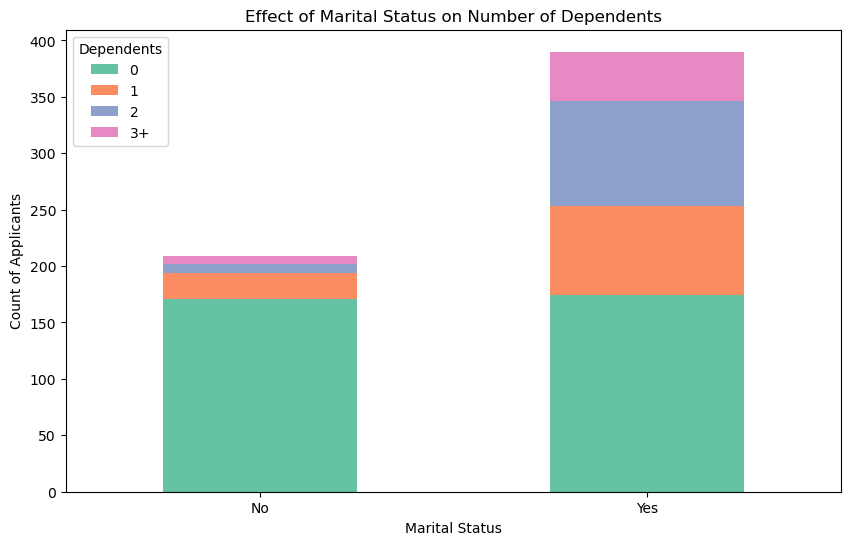

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Married'], df['Dependents'])

# Display the contingency table
print(contingency_table)

# Plot a stacked bar chart to visualize the relationship
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set2"))
plt.title('Effect of Marital Status on Number of Dependents')
plt.xlabel('Marital Status')
plt.ylabel('Count of Applicants')
plt.xticks(rotation=0)
plt.show()

Dependents    0   1   2  3+
Gender                     
Female       83  19   7   3
Male        262  83  94  48


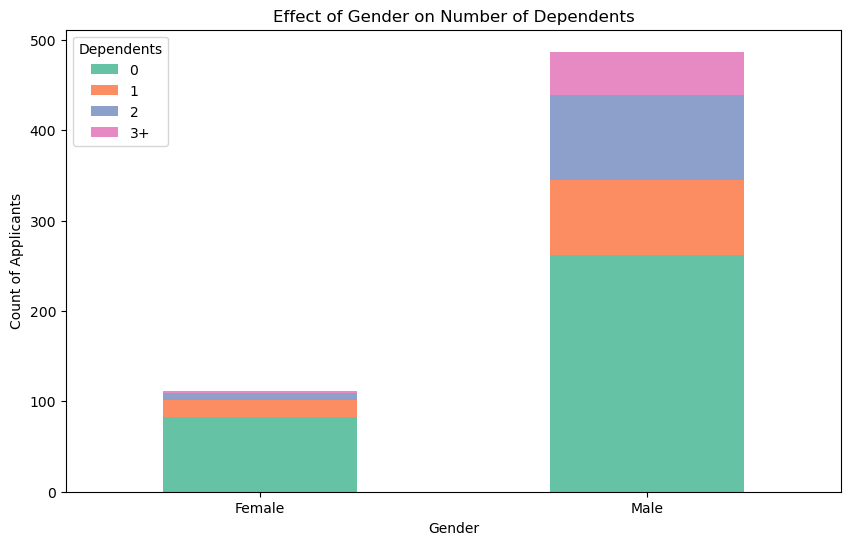

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Dependents'])

# Display the contingency table
print(contingency_table)

# Plot a stacked bar chart to visualize the relationship
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set2"))
plt.title('Effect of Gender on Number of Dependents')
plt.xlabel('Gender')
plt.ylabel('Count of Applicants')
plt.xticks(rotation=0)
plt.show()

Dependents    0   1   2   3
Married                    
No          112  10   6   4
Yes         152  73  88  44


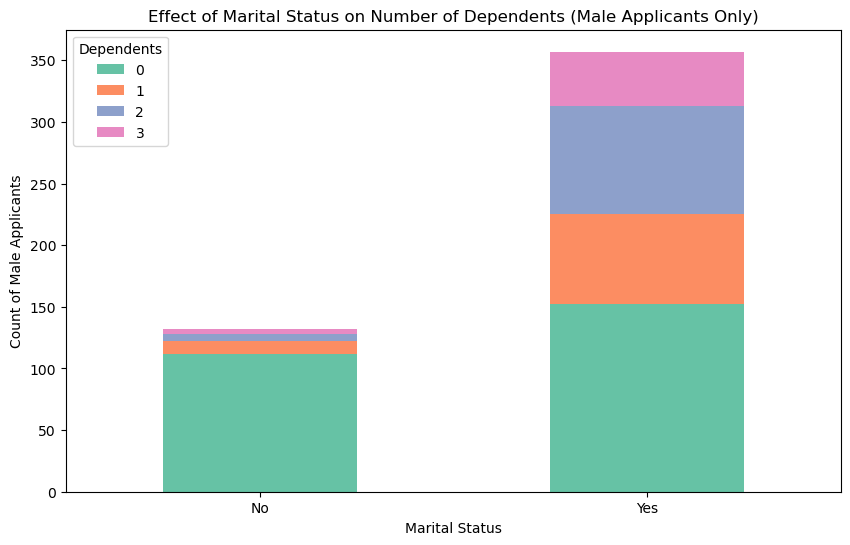

In [ ]:
# Filter the dataset for Male gender
male_df = df[df['Gender'] == 'Male']

# Create a contingency table for the filtered dataset
contingency_table = pd.crosstab(male_df['Married'], male_df['Dependents'])

# Display the contingency table
print(contingency_table)

# Plot a stacked bar chart to visualize the relationship
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set2"))
plt.title('Effect of Marital Status on Number of Dependents (Male Applicants Only)')
plt.xlabel('Marital Status')
plt.ylabel('Count of Male Applicants')
plt.xticks(rotation=0)
plt.show()


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')

Dependents       0   1   2   3
Self_Employed                 
No             302  76  80  42
Yes             39  20  16   7


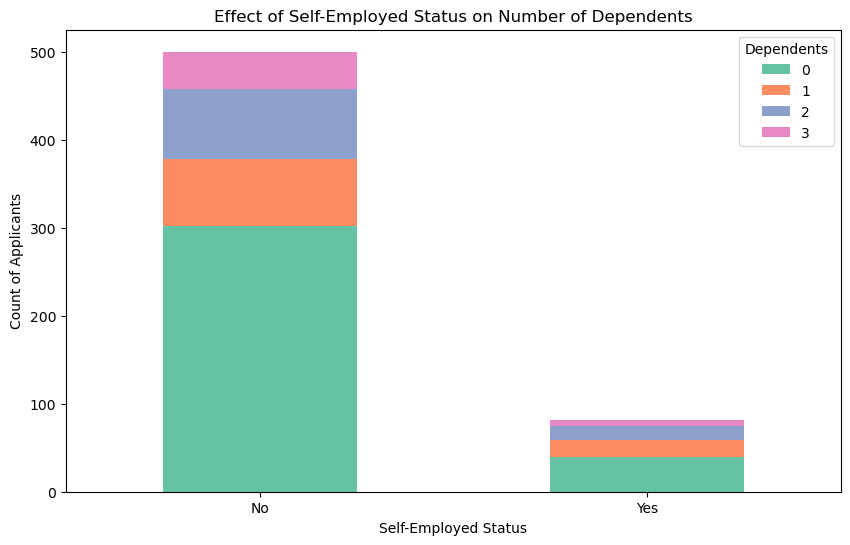

In [ ]:
# Create a contingency table for Self_Employed vs Dependents
contingency_table = pd.crosstab(df['Self_Employed'], df['Dependents'])

# Display the contingency table
print(contingency_table)

# Plot a stacked bar chart to visualize the relationship
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set2"))
plt.title('Effect of Self-Employed Status on Number of Dependents')
plt.xlabel('Self-Employed Status')
plt.ylabel('Count of Applicants')
plt.xticks(rotation=0)
plt.show()


In [ ]:
df['Married'].isnull().value_counts()

Married
False    614
Name: count, dtype: int64

In [ ]:
df.loc[(df['Gender']=='Female')&(df['Dependents'].isnull()), 'Dependents']=0

In [ ]:
df.loc[(df['Dependents']=='3+'), 'Dependents']=3

In [ ]:
df.loc[(df['Dependents']=='2'), 'Dependents']=2

In [ ]:
df.loc[(df['Dependents']=='1'), 'Dependents']=1

In [ ]:
df.loc[(df['Dependents']=='0'), 'Dependents']=0

In [ ]:
df.loc[(df['Married']=='No')&(df['Dependents'].isnull()), 'Dependents']=0

In [ ]:
df['Dependents'].isnull().value_counts()

Dependents
False    599
True      15
Name: count, dtype: int64

In [ ]:
df.loc[(df['Self_Employed']=='No')&(df['Dependents'].isnull()), 'Dependents']=0

In [ ]:
df[df['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735.0,0.0,138.0,360.0,1.0,Urban,N
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503.0,4490.0,70.0,NaN,1.0,Semiurban,Y


In [ ]:
df['Dependents']=df['Dependents'].fillna('0')

In [ ]:
df[df['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status


In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df['Education'].isnull().value_counts()

Education
False    613
True       1
Name: count, dtype: int64

In [ ]:
df[df['Education'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
8,LP001018,Male,Yes,2,NaN,No,4006.0,1526.0,168.0,360.0,1.0,Urban,Y


In [ ]:
df['Education'].value_counts()

Education
Graduate        479
Not Graduate    134
Name: count, dtype: int64

In [ ]:
df['Education']=df['Education'].fillna('Not Graduate')

In [ ]:
df[df['Education'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status


In [ ]:
df['Self_Employed'].isnull().value_counts()

Self_Employed
False    582
True      32
Name: count, dtype: int64

In [ ]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

Self_Employed   No  Yes
Education              
Graduate       388   65
Not Graduate   118   17


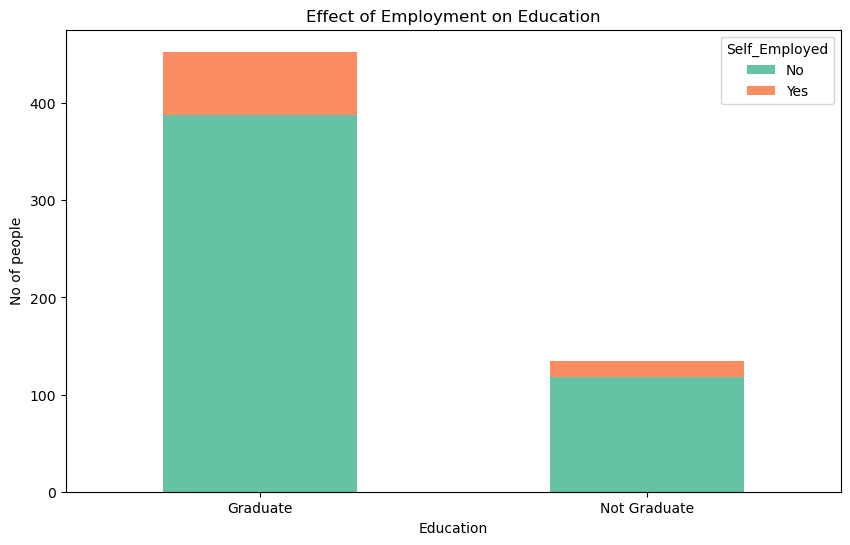

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Education'], df['Self_Employed'])

# Display the contingency table
print(contingency_table)

# Plot a stacked bar chart to visualize the relationship
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set2"))
plt.title('Effect of Employment on Education')
plt.xlabel('Education')
plt.ylabel('No of people')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df.loc[(df['Education']=='Not Graduate')&(df['Self_Employed'].isnull()), 'Self_Employed']='No'

In [ ]:
df['Self_Employed'].isnull().value_counts()

Self_Employed
False    588
True      26
Name: count, dtype: int64

Self_Employed   No  Yes
Dependents             
0              306   39
1               77   20
2               81   16
3               42    7


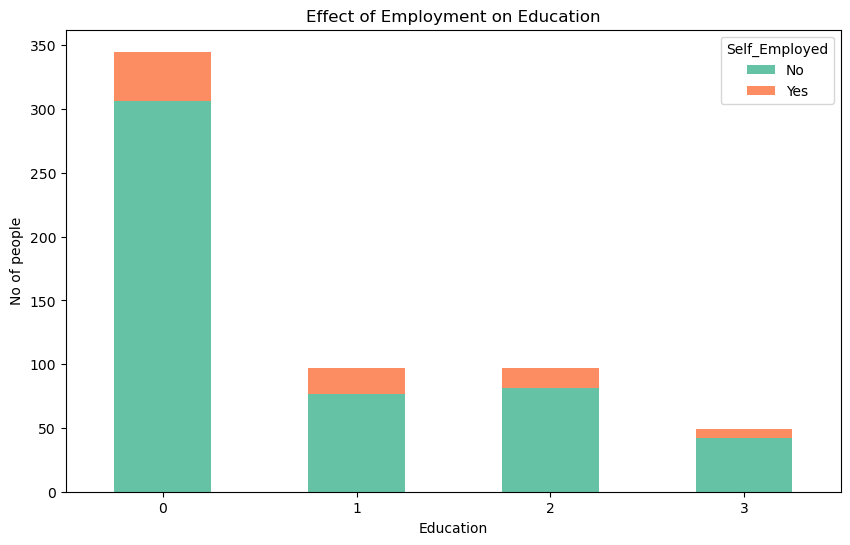

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Dependents'], df['Self_Employed'])

# Display the contingency table
print(contingency_table)

# Plot a stacked bar chart to visualize the relationship
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=sns.color_palette("Set2"))
plt.title('Effect of Employment on Education')
plt.xlabel('Education')
plt.ylabel('No of people')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df['Self_Employed'].fillna('No',inplace=True)

In [ ]:
df['Self_Employed'].isnull().value_counts()

Self_Employed
False    614
Name: count, dtype: int64

In [ ]:
df['ApplicantIncome'].isnull().value_counts()

ApplicantIncome
False    612
True       2
Name: count, dtype: int64

In [ ]:
df['ApplicantIncome'].describe()

count      612.000000
mean      5405.540850
std       6118.914057
min        150.000000
25%       2875.750000
50%       3806.000000
75%       5803.750000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [ ]:
df['ApplicantIncome'].isnull()

In [ ]:
df[df['ApplicantIncome'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status



Mean ApplicantIncome by Loan_ID:

Loan_ID
LP001722      150.0
LP002502      210.0
LP002949      416.0
LP002603      645.0
LP001644      674.0
             ...   
LP001585    51763.0
LP002101    63337.0
LP002317    81000.0
LP001003        NaN
LP001032        NaN
Name: ApplicantIncome, Length: 614, dtype: float64


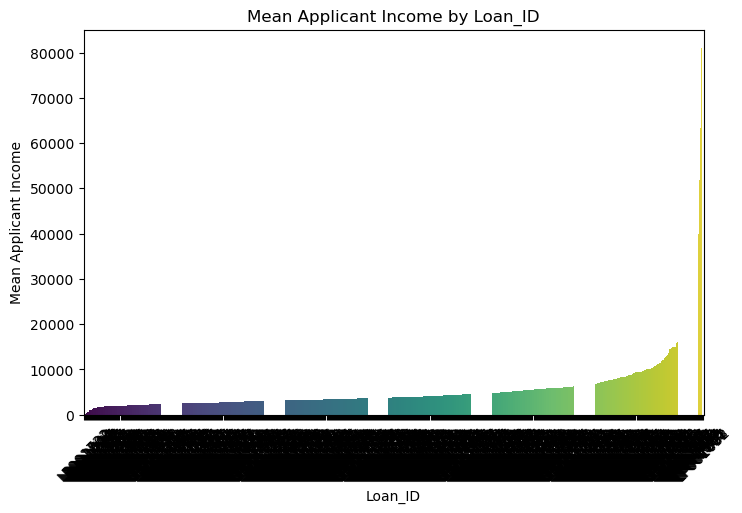


Mean ApplicantIncome by Gender:

Gender
Female    4654.330435
Male      5579.362173
Name: ApplicantIncome, dtype: float64


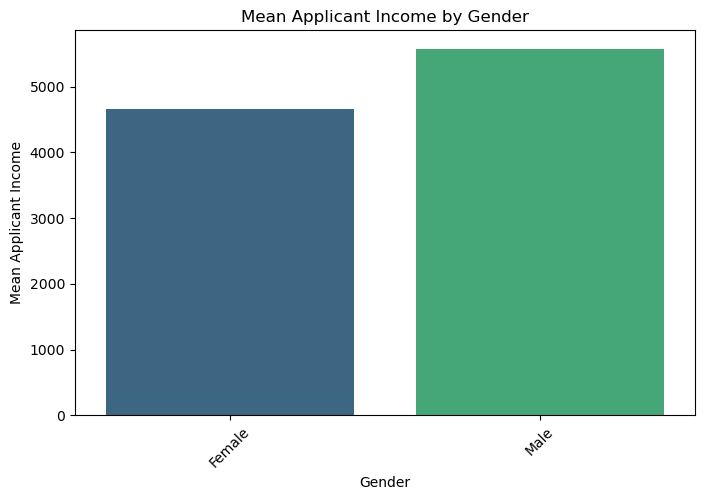


Mean ApplicantIncome by Married:

Married
No     4970.481132
Yes    5636.122500
Name: ApplicantIncome, dtype: float64


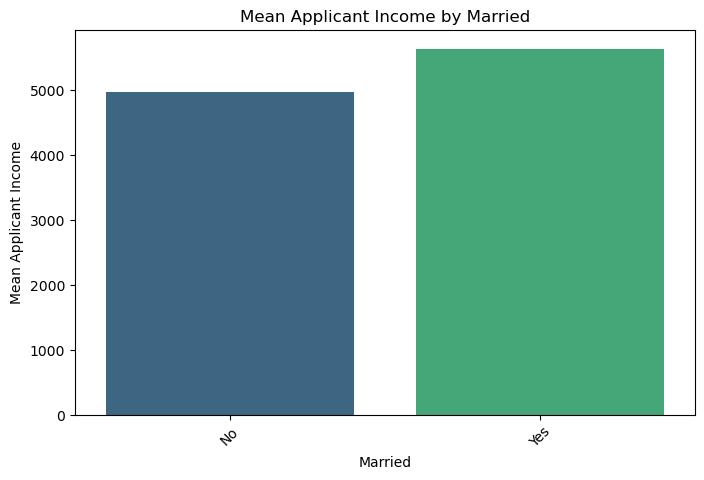


Mean ApplicantIncome by Dependents:

Dependents
2    4926.782178
0    4928.621170
1    5975.930693
3    8581.215686
Name: ApplicantIncome, dtype: float64


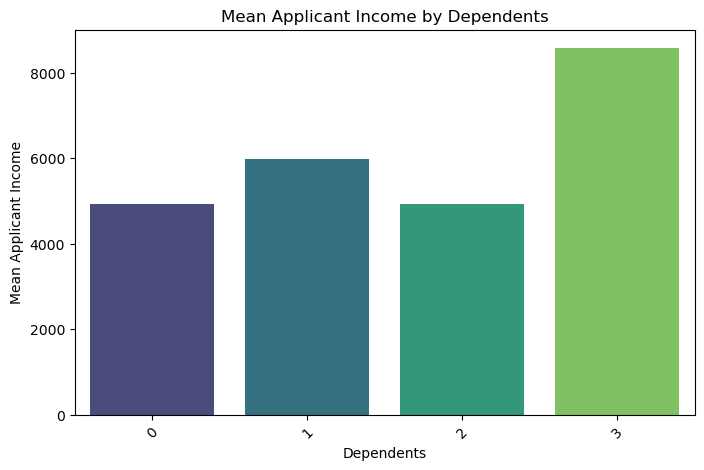


Mean ApplicantIncome by Education:

Education
Not Graduate    3778.977778
Graduate        5865.888889
Name: ApplicantIncome, dtype: float64


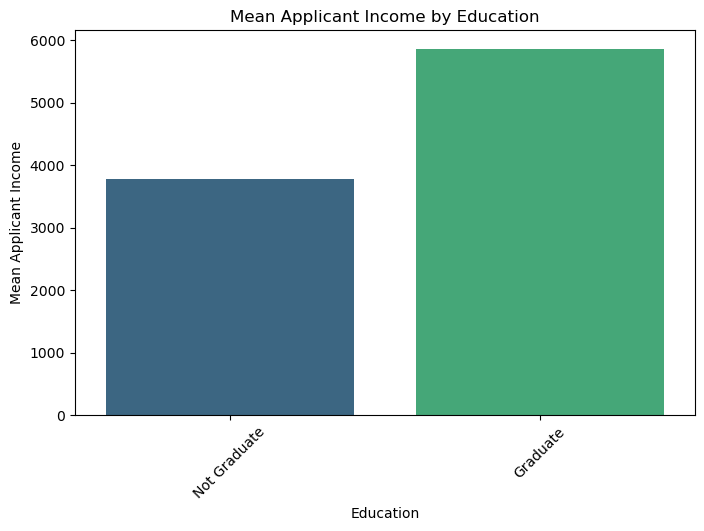


Mean ApplicantIncome by Self_Employed:

Self_Employed
No     5099.932075
Yes    7380.817073
Name: ApplicantIncome, dtype: float64


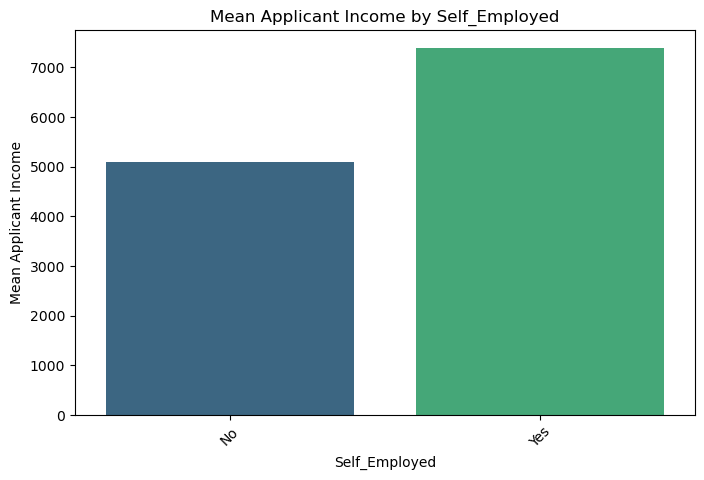


Mean ApplicantIncome by CoapplicantIncome:

CoapplicantIncome
41667.0      416.0
3683.0       645.0
5296.0       674.0
3022.0      1000.0
2773.0      1025.0
            ...   
1014.0     16525.0
5266.0     19730.0
6667.0     20833.0
4750.0     21448.5
1508.0         NaN
Name: ApplicantIncome, Length: 286, dtype: float64


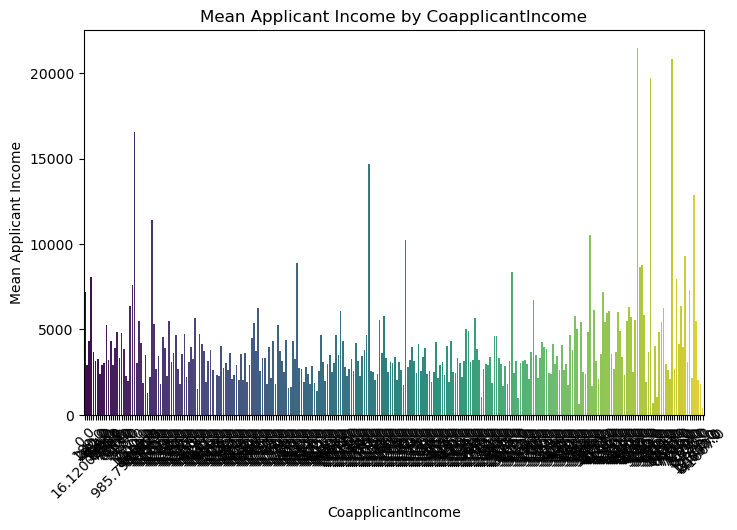


Mean ApplicantIncome by LoanAmount:

LoanAmount
350.0      416.0
17.0      1299.0
167.0     1378.0
35.0      1442.0
239.0     1600.0
          ...   
370.0    23803.0
600.0    29741.5
700.0    51763.0
490.0    63337.0
360.0    81000.0
Name: ApplicantIncome, Length: 203, dtype: float64


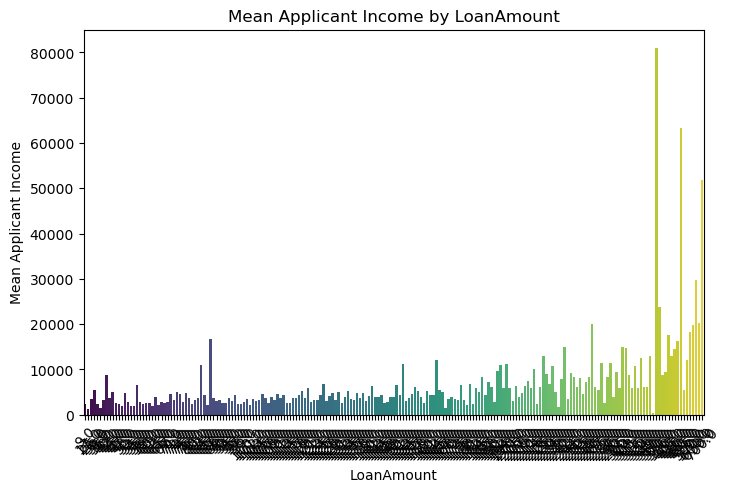


Mean ApplicantIncome by Loan_Amount_Term:

Loan_Amount_Term
120.0    2792.666667
36.0     3419.500000
84.0     4128.500000
480.0    4398.933333
12.0     4625.000000
60.0     5032.500000
360.0    5300.168627
240.0    5907.750000
180.0    6927.886364
300.0    8184.923077
Name: ApplicantIncome, dtype: float64


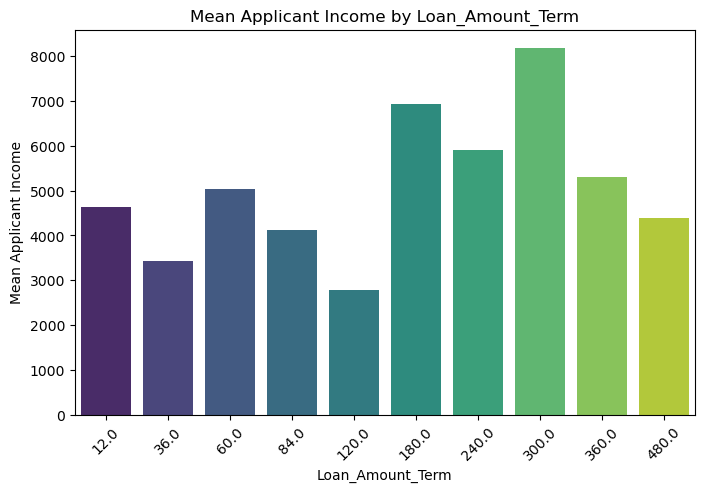


Mean ApplicantIncome by Credit_History:

Credit_History
1.0    5429.317125
0.0    5679.438202
Name: ApplicantIncome, dtype: float64


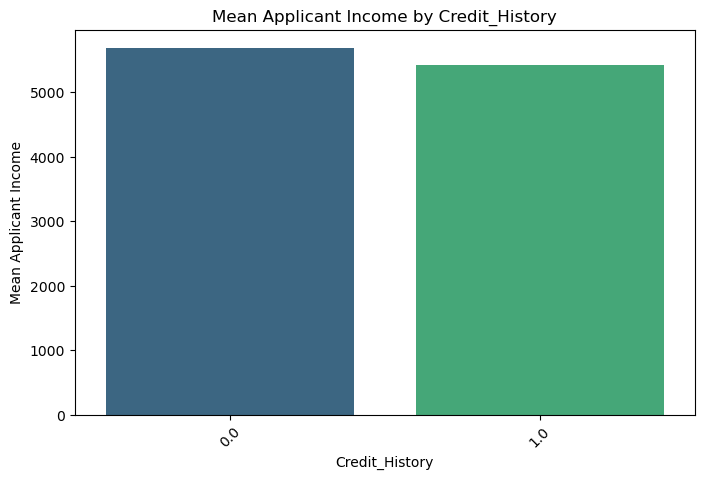


Mean ApplicantIncome by property_Area:

property_Area
Semiurban    5292.261803
Urban        5400.477612
Rural        5559.539326
Name: ApplicantIncome, dtype: float64


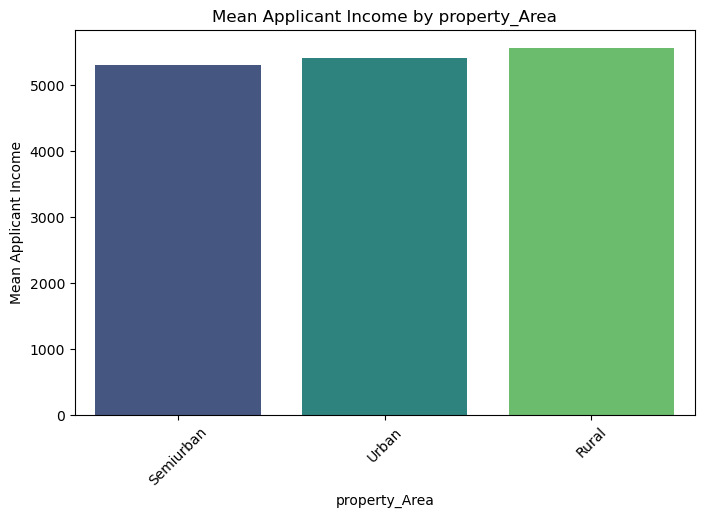


Mean ApplicantIncome by Loan_Status:

Loan_Status
Y    5385.099762
N    5450.596859
Name: ApplicantIncome, dtype: float64


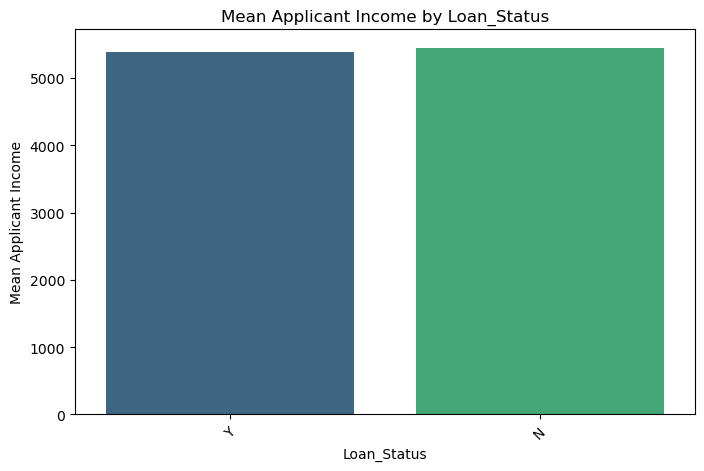

In [ ]:
# List of all columns except ApplicantIncome
columns = [col for col in df.columns if col != 'ApplicantIncome']

# Loop through each column and plot the mean ApplicantIncome
for col in columns:
    mean_income = df.groupby(col)['ApplicantIncome'].mean().sort_values()

    # Display mean values
    print(f"\nMean ApplicantIncome by {col}:\n")
    print(mean_income)

    # Plot the mean income for each category
    plt.figure(figsize=(8, 5))
    sns.barplot(x=mean_income.index, y=mean_income.values, palette='viridis')
    plt.title(f'Mean Applicant Income by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Applicant Income')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
grouped_mean = df.groupby('Dependents')['ApplicantIncome'].mean()

# Map the mean values to missing rows in the Dependents column
df['ApplicantIncome'] = df['ApplicantIncome'].fillna(
    df['Dependents'].map(grouped_mean)
)

In [ ]:
df['ApplicantIncome'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: ApplicantIncome, Length: 614, dtype: bool

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.000000,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5975.930693,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.000000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.000000,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.000000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df['CoapplicantIncome'].isnull().value_counts()

CoapplicantIncome
False    613
True       1
Name: count, dtype: int64


Mean CoapplicantIncome by Loan_ID:

Loan_ID
LP001002        0.0
LP002114        0.0
LP002113        0.0
LP002101        0.0
LP002100        0.0
             ...   
LP002342    20000.0
LP002297    20000.0
LP002893    33837.0
LP002949    41667.0
LP001027        NaN
Name: CoapplicantIncome, Length: 614, dtype: float64


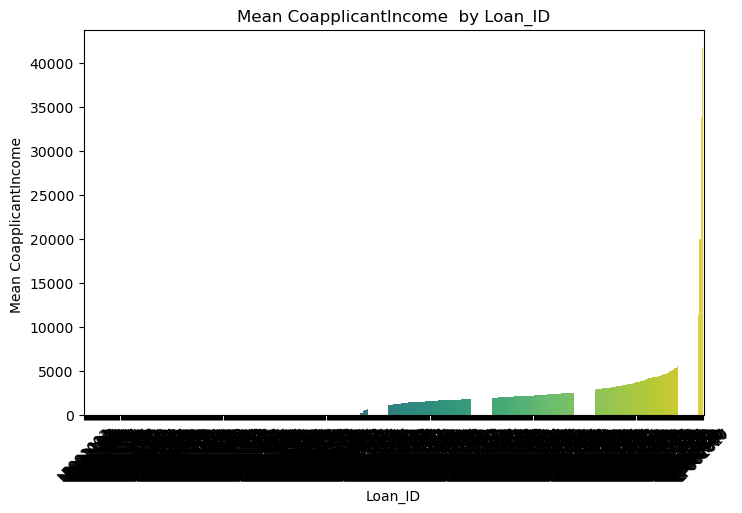


Mean CoapplicantIncome by Gender:

Gender
Female    1127.347826
Male      1734.859277
Name: CoapplicantIncome, dtype: float64


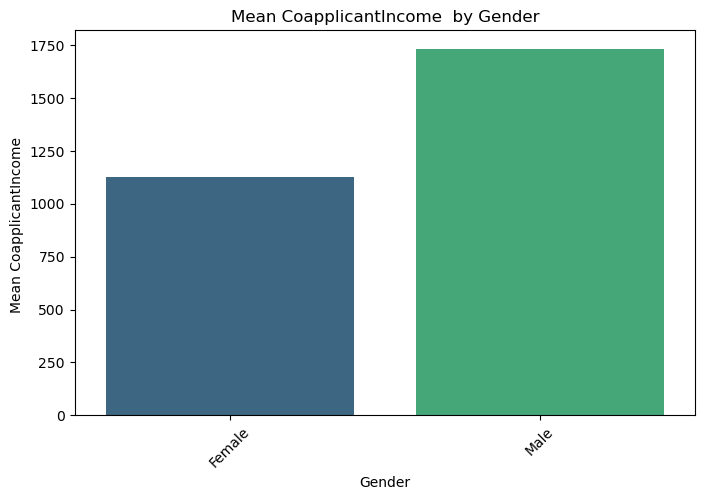


Mean CoapplicantIncome by Married:

Married
No     1316.558685
Yes    1782.944800
Name: CoapplicantIncome, dtype: float64


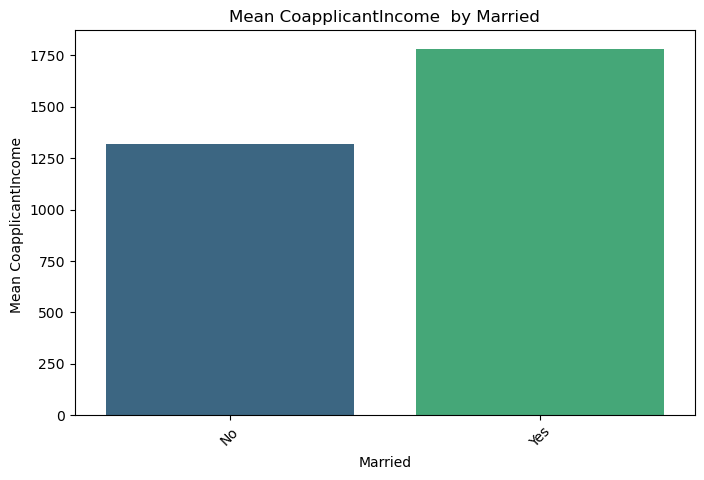


Mean CoapplicantIncome by Dependents:

Dependents
1    1426.235294
0    1600.880889
2    1685.718000
3    2024.313725
Name: CoapplicantIncome, dtype: float64


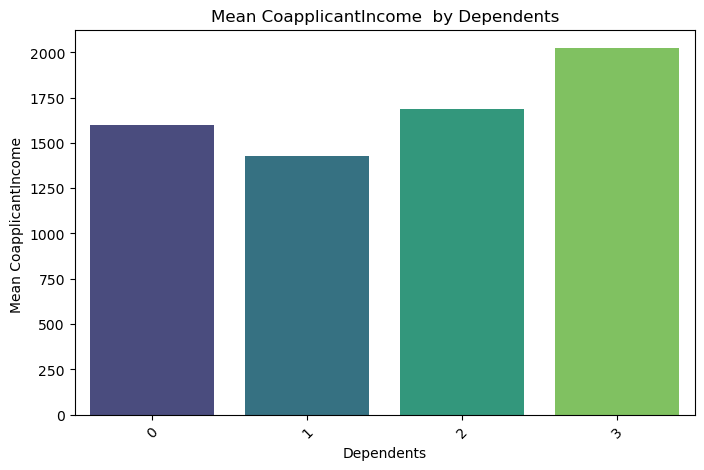


Mean CoapplicantIncome by Education:

Education
Not Graduate    1278.392593
Graduate        1717.619079
Name: CoapplicantIncome, dtype: float64


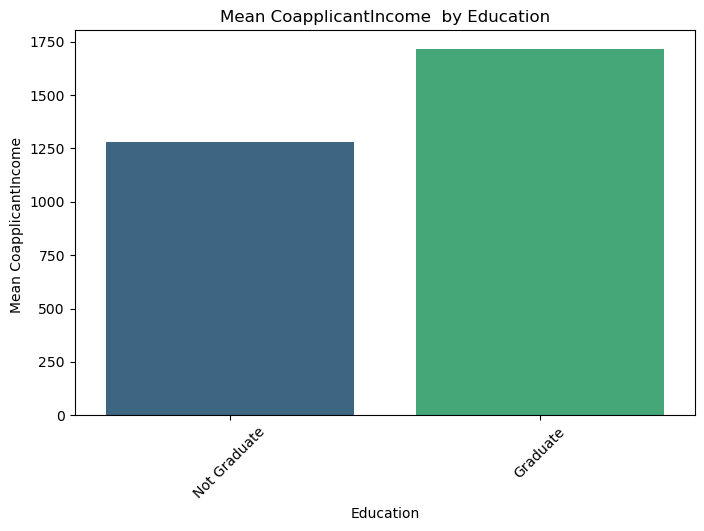


Mean CoapplicantIncome by Self_Employed:

Self_Employed
Yes    1501.341463
No     1639.350132
Name: CoapplicantIncome, dtype: float64


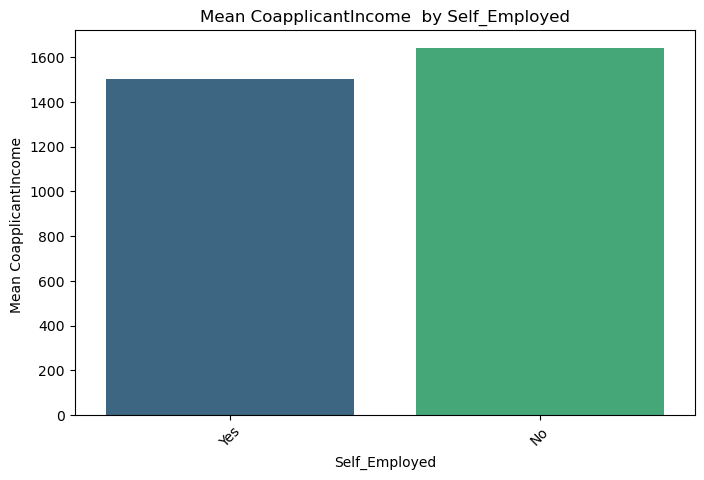


Mean CoapplicantIncome by ApplicantIncome:

ApplicantIncome
81000.0        0.0
5800.0         0.0
3237.0         0.0
3244.0         0.0
3250.0         0.0
            ...   
12841.0    10968.0
5516.0     11300.0
1600.0     20000.0
1836.0     33837.0
416.0      41667.0
Name: CoapplicantIncome, Length: 506, dtype: float64


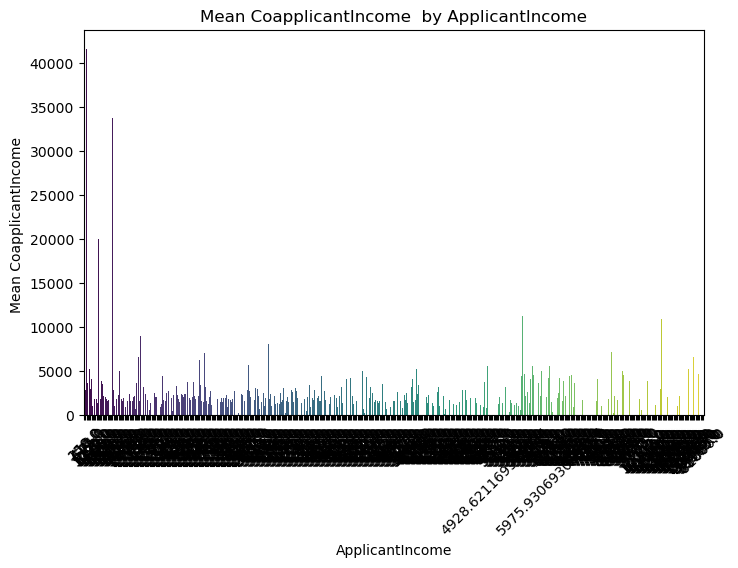


Mean CoapplicantIncome by LoanAmount:

LoanAmount
9.0          0.0
240.0        0.0
234.0        0.0
228.0        0.0
218.0        0.0
          ...   
380.0     7873.0
349.0    10968.0
495.0    11300.0
239.0    20000.0
350.0    41667.0
Name: CoapplicantIncome, Length: 203, dtype: float64


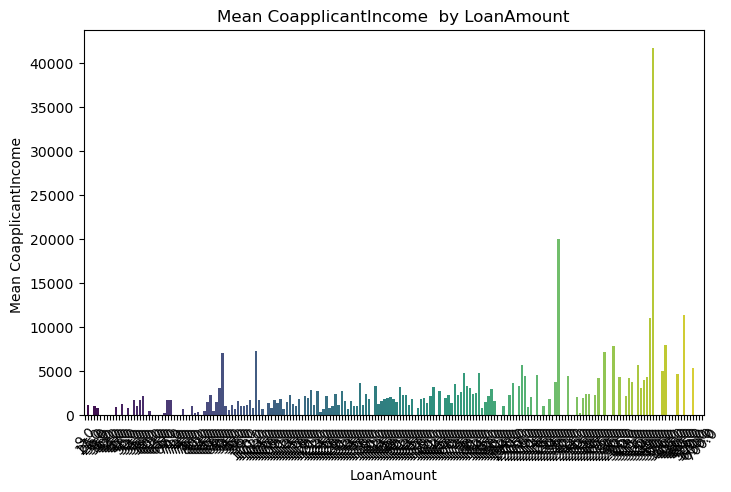


Mean CoapplicantIncome by Loan_Amount_Term:

Loan_Amount_Term
36.0        0.000000
240.0       0.000000
120.0     362.000000
480.0    1013.000000
84.0     1093.500000
360.0    1561.714521
300.0    2280.384615
180.0    2556.154545
60.0     2850.500000
12.0     2857.000000
Name: CoapplicantIncome, dtype: float64


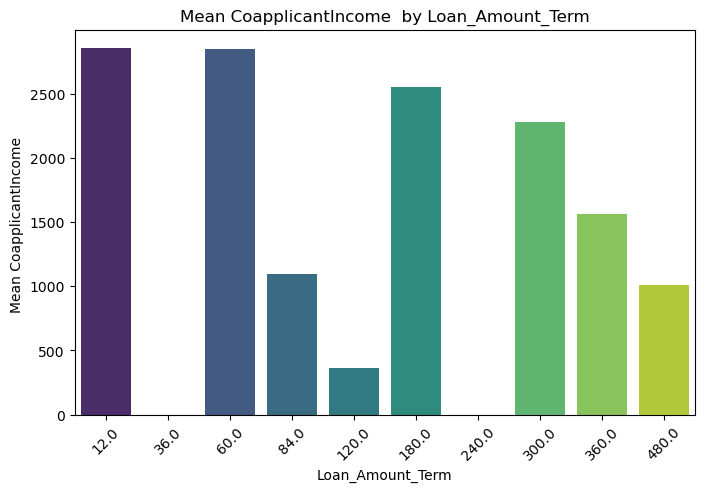


Mean CoapplicantIncome by Credit_History:

Credit_History
1.0    1527.592658
0.0    1542.179775
Name: CoapplicantIncome, dtype: float64


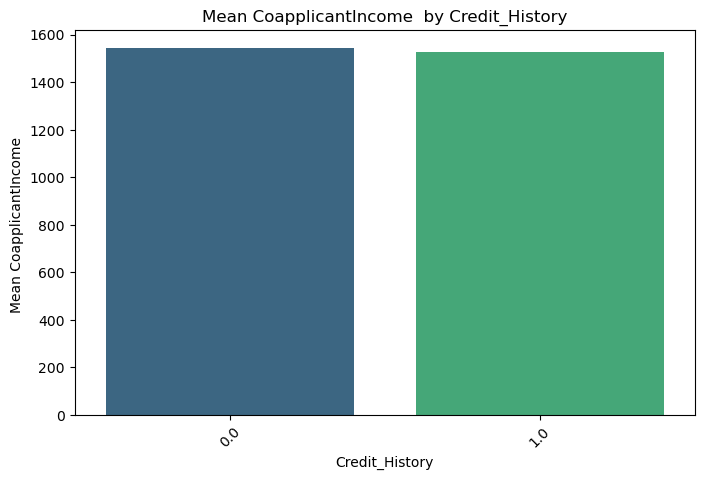


Mean CoapplicantIncome by property_Area:

property_Area
Semiurban    1520.133047
Rural        1645.536983
Urban        1715.735323
Name: CoapplicantIncome, dtype: float64


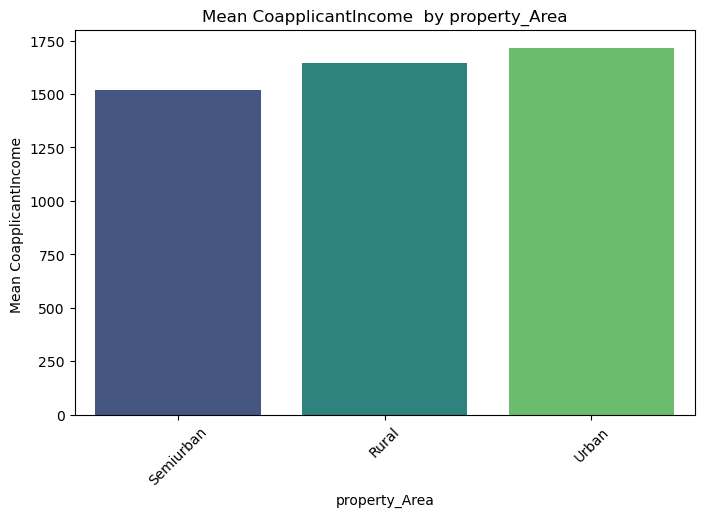


Mean CoapplicantIncome by Loan_Status:

Loan_Status
Y    1503.719525
N    1877.807292
Name: CoapplicantIncome, dtype: float64


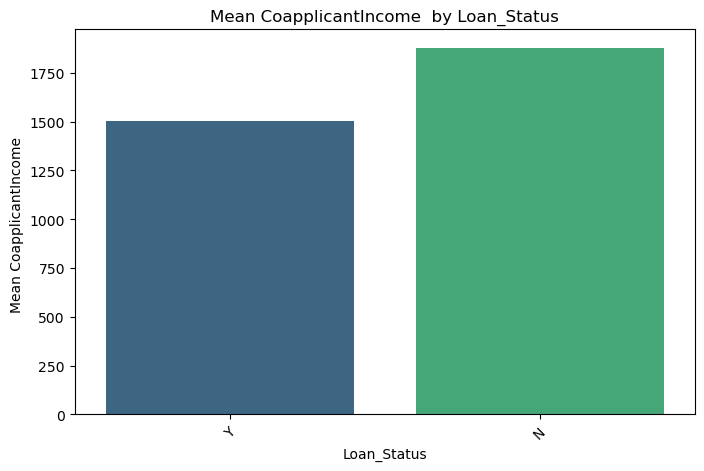

In [ ]:
# List of all columns except CoapplicantIncome
columns = [col for col in df.columns if col != 'CoapplicantIncome']

# Loop through each column and plot the mean CoapplicantIncome
for col in columns:
    mean_income = df.groupby(col)['CoapplicantIncome'].mean().sort_values()

    # Display mean values
    print(f"\nMean CoapplicantIncome by {col}:\n")
    print(mean_income)

    # Plot the mean income for each category
    plt.figure(figsize=(8, 5))
    sns.barplot(x=mean_income.index, y=mean_income.values, palette='viridis')
    plt.title(f'Mean CoapplicantIncome  by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean CoapplicantIncome ')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
grouped_mean1 = df.groupby('Married')['CoapplicantIncome'].mean()

# Map the mean values to missing rows in the Dependents column
df['CoapplicantIncome'] = df['CoapplicantIncome'].fillna(
    df['Married'].map(grouped_mean1))

In [ ]:
df['CoapplicantIncome'].isnull().value_counts()

CoapplicantIncome
False    614
Name: count, dtype: int64

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.000000,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5975.930693,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.000000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.000000,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.000000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df['LoanAmount'].isnull().value_counts()

LoanAmount
False    592
True      22
Name: count, dtype: int64


Mean LoanAmount by Loan_ID:

Loan_ID
LP002840     9.0
LP001030    17.0
LP001325    25.0
LP001482    25.0
LP002792    26.0
            ... 
LP002533     NaN
LP002697     NaN
LP002778     NaN
LP002784     NaN
LP002960     NaN
Name: LoanAmount, Length: 614, dtype: float64


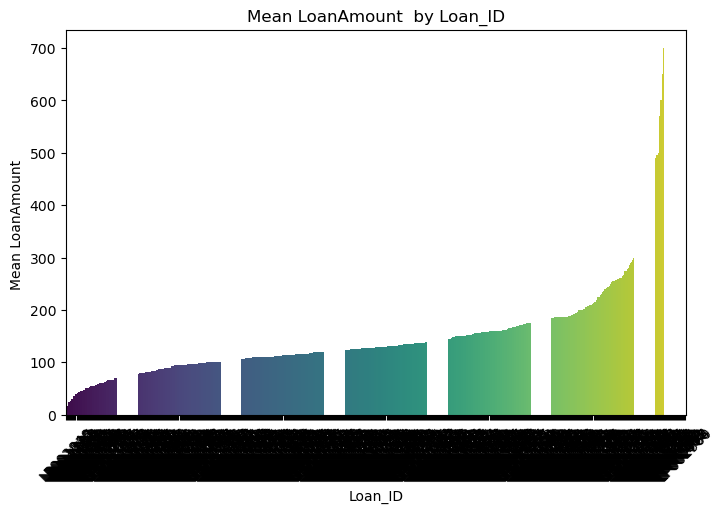


Mean LoanAmount by Gender:

Gender
Female    127.526786
Male      150.818750
Name: LoanAmount, dtype: float64


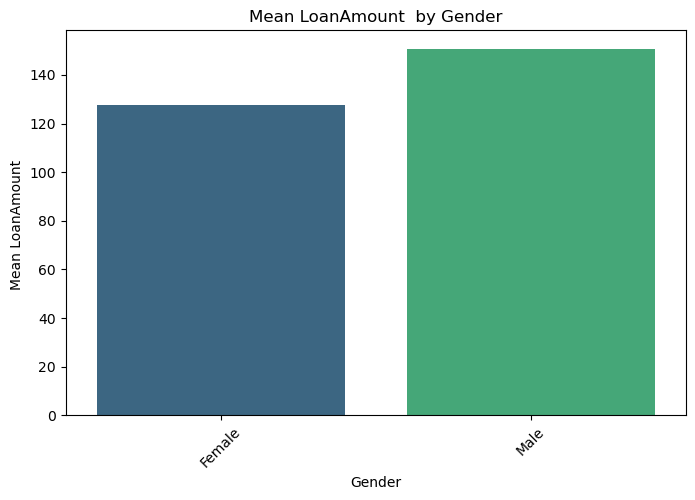


Mean LoanAmount by Married:

Married
No     128.883495
Yes    155.766839
Name: LoanAmount, dtype: float64


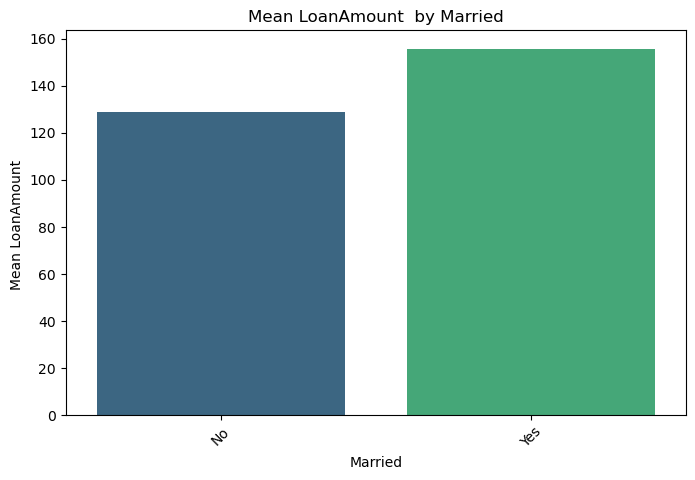


Mean LoanAmount by Dependents:

Dependents
0    135.605187
2    150.224490
1    158.622449
3    190.897959
Name: LoanAmount, dtype: float64


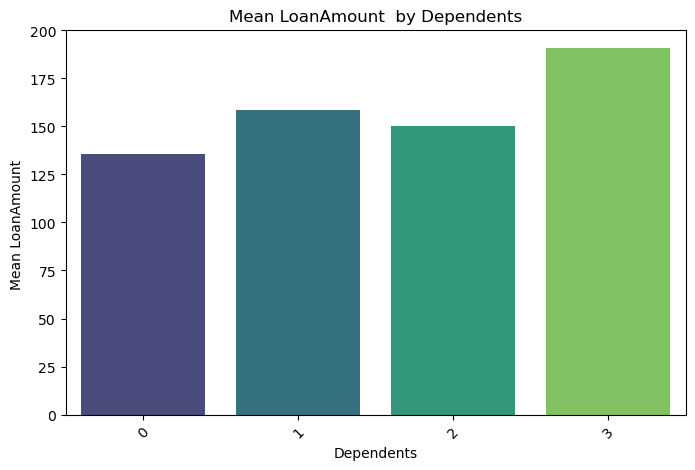


Mean LoanAmount by Education:

Education
Not Graduate    118.796875
Graduate        154.030172
Name: LoanAmount, dtype: float64


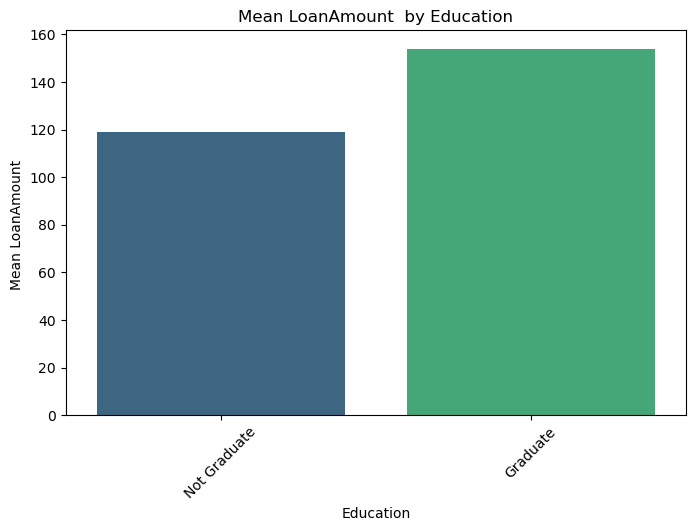


Mean LoanAmount by Self_Employed:

Self_Employed
No     142.471735
Yes    172.000000
Name: LoanAmount, dtype: float64


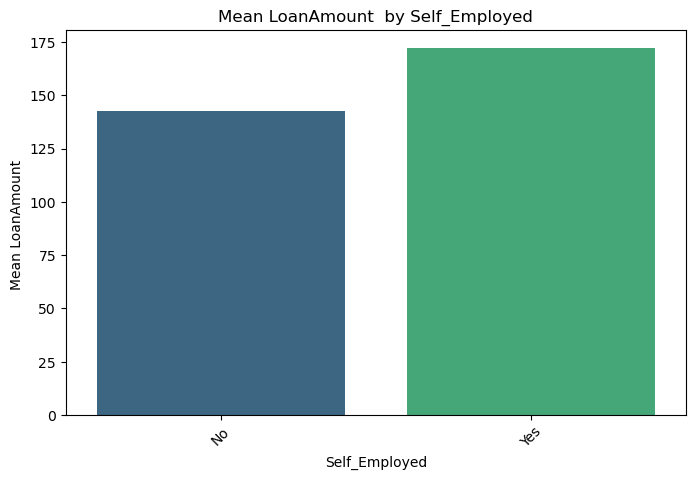


Mean LoanAmount by ApplicantIncome:

ApplicantIncome
1299.0     17.0
3620.0     25.0
3459.0     25.0
5468.0     26.0
2378.0     27.5
           ... 
6782.0      NaN
7451.0      NaN
10047.0     NaN
13650.0     NaN
20667.0     NaN
Name: LoanAmount, Length: 506, dtype: float64


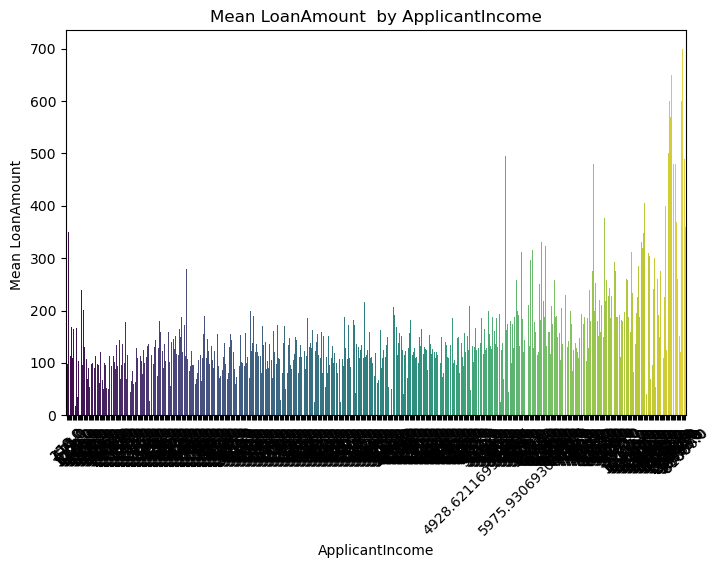


Mean LoanAmount by CoapplicantIncome:

CoapplicantIncome
1086.0    17.0
1032.0    26.0
1425.0    30.0
1742.0    45.0
1213.0    47.0
          ... 
2087.0     NaN
2375.0     NaN
3136.0     NaN
3583.0     NaN
3800.0     NaN
Name: LoanAmount, Length: 287, dtype: float64


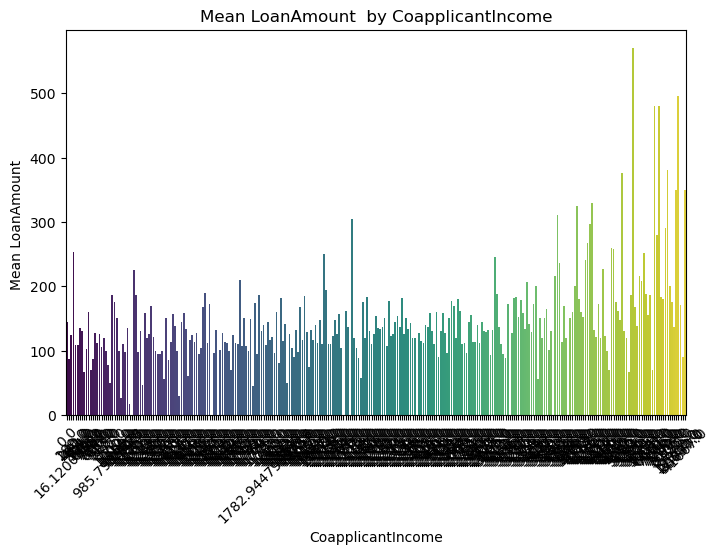


Mean LoanAmount by Loan_Amount_Term:

Loan_Amount_Term
120.0     22.333333
12.0     111.000000
36.0     117.500000
240.0    118.333333
84.0     132.250000
60.0     140.000000
360.0    147.245436
180.0    147.523810
480.0    151.800000
300.0    185.153846
Name: LoanAmount, dtype: float64


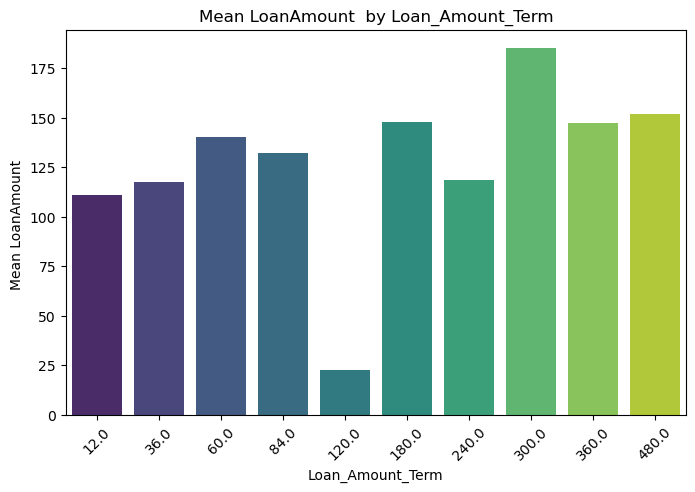


Mean LoanAmount by Credit_History:

Credit_History
1.0    144.786026
0.0    146.717647
Name: LoanAmount, dtype: float64


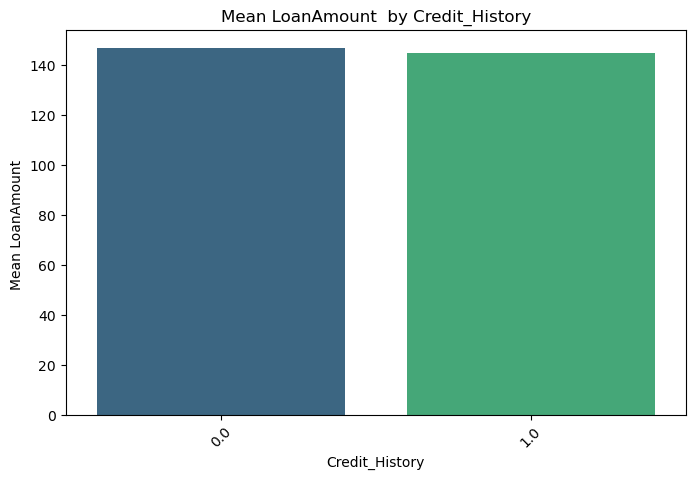


Mean LoanAmount by property_Area:

property_Area
Urban        142.198953
Semiurban    145.504386
Rural        152.260116
Name: LoanAmount, dtype: float64


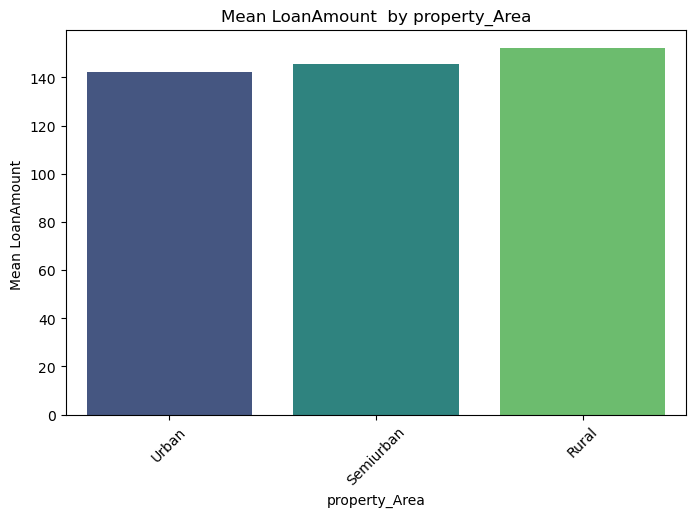


Mean LoanAmount by Loan_Status:

Loan_Status
Y    144.294404
N    151.220994
Name: LoanAmount, dtype: float64


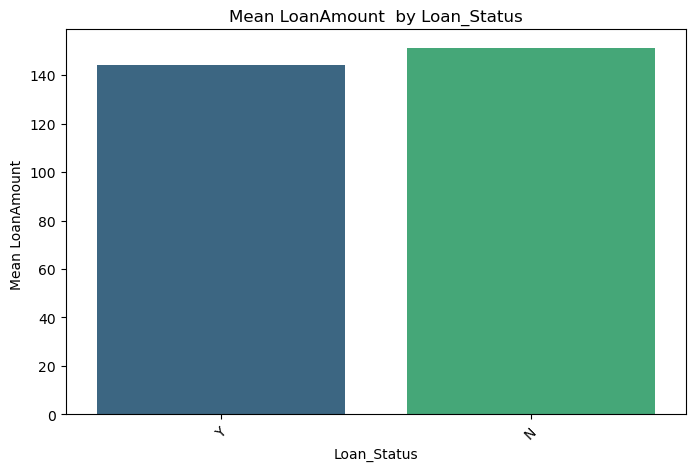

In [ ]:
# List of all columns except CoapplicantIncome
columns = [col for col in df.columns if col != 'LoanAmount']

# Loop through each column and plot the mean LoanAmount
for col in columns:
    mean_income = df.groupby(col)['LoanAmount'].mean().sort_values()

    # Display mean values
    print(f"\nMean LoanAmount by {col}:\n")
    print(mean_income)

    # Plot the mean income for each category
    plt.figure(figsize=(8, 5))
    sns.barplot(x=mean_income.index, y=mean_income.values, palette='viridis')
    plt.title(f'Mean LoanAmount  by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean LoanAmount ')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
df['LoanAmount'].describe()

count    614.000000
mean     146.440858
std       84.071072
min        9.000000
25%      100.250000
50%      128.883495
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

In [ ]:
grouped_mean1 = df.groupby('Married')['LoanAmount'].mean()

# Map the mean values to missing rows in the Dependents column
df['LoanAmount'] = df['LoanAmount'].fillna(
    df['Married'].map(grouped_mean1))

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.000000,0.0,128.883495,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5975.930693,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.000000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.000000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.000000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
df['Loan_Amount_Term'].isnull().value_counts()

Loan_Amount_Term
False    600
True      14
Name: count, dtype: int64

In [ ]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [ ]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)


In [ ]:
df['Loan_Amount_Term'].isnull().value_counts()

Loan_Amount_Term
False    614
Name: count, dtype: int64

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.000000,0.0,128.883495,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5975.930693,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.000000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.000000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.000000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
df['Credit_History'].isnull().value_counts()

Credit_History
False    564
True      50
Name: count, dtype: int64

In [ ]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


Mean Credit_History by Loan_ID:

Loan_ID
LP002990    0.0
LP002446    0.0
LP002448    0.0
LP002449    0.0
LP001641    0.0
           ... 
LP002757    NaN
LP002794    NaN
LP002833    NaN
LP002898    NaN
LP002949    NaN
Name: Credit_History, Length: 614, dtype: float64


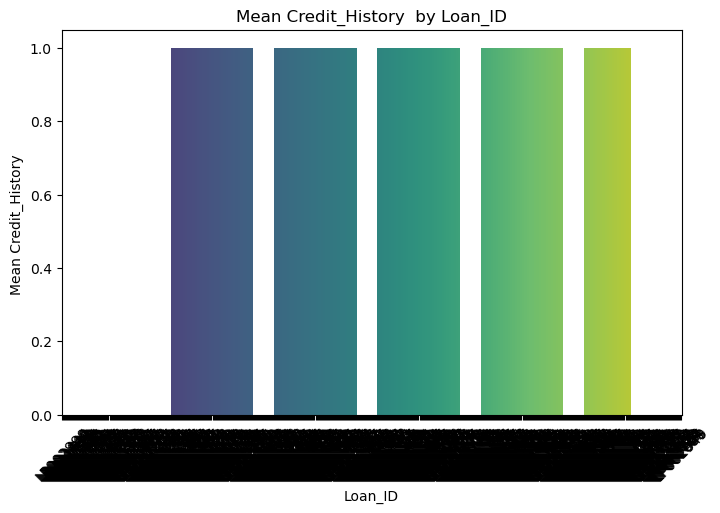


Mean Credit_History by Gender:

Gender
Female    0.826923
Male      0.845652
Name: Credit_History, dtype: float64


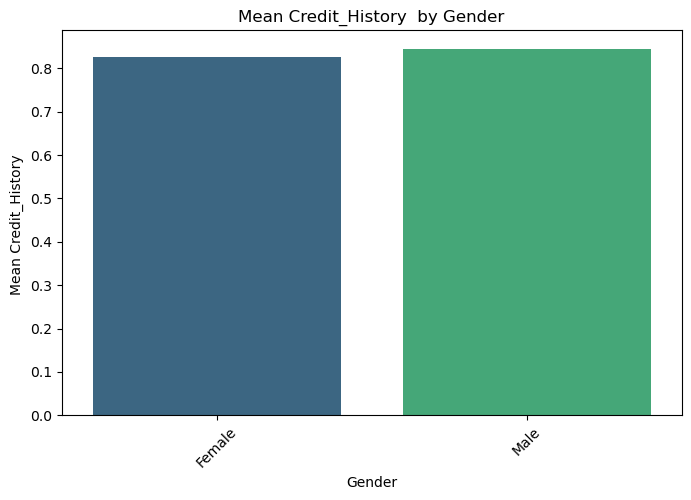


Mean Credit_History by Married:

Married
No     0.839196
Yes    0.843836
Name: Credit_History, dtype: float64


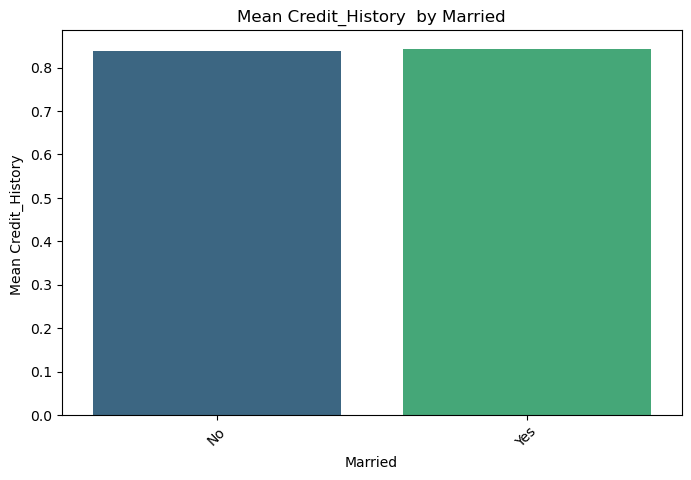


Mean Credit_History by Dependents:

Dependents
3    0.770833
1    0.844444
0    0.848943
2    0.852632
Name: Credit_History, dtype: float64


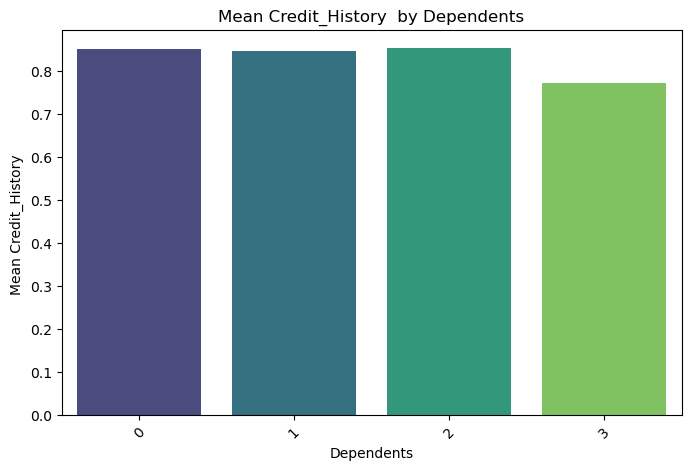


Mean Credit_History by Education:

Education
Not Graduate    0.786885
Graduate        0.857466
Name: Credit_History, dtype: float64


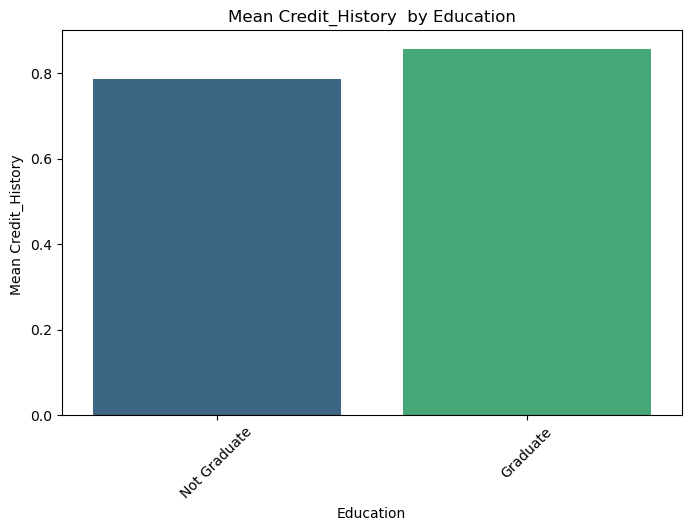


Mean Credit_History by Self_Employed:

Self_Employed
Yes    0.840000
No     0.842536
Name: Credit_History, dtype: float64


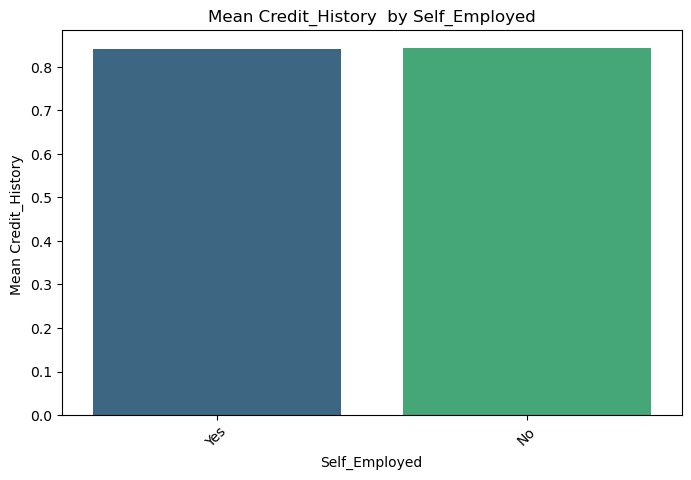


Mean Credit_History by ApplicantIncome:

ApplicantIncome
81000.0    0.0
3062.0     0.0
3036.0     0.0
3010.0     0.0
2987.0     0.0
          ... 
6782.0     NaN
7667.0     NaN
11250.0    NaN
20166.0    NaN
20833.0    NaN
Name: Credit_History, Length: 506, dtype: float64


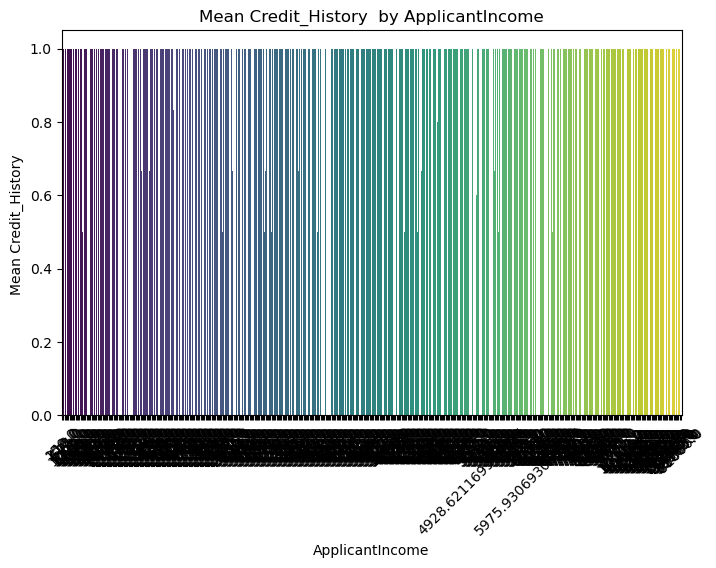


Mean Credit_History by CoapplicantIncome:

CoapplicantIncome
1664.0     0.0
1280.0     0.0
1330.0     0.0
4114.0     0.0
4000.0     0.0
          ... 
5302.0     NaN
5500.0     NaN
6667.0     NaN
8333.0     NaN
41667.0    NaN
Name: Credit_History, Length: 287, dtype: float64


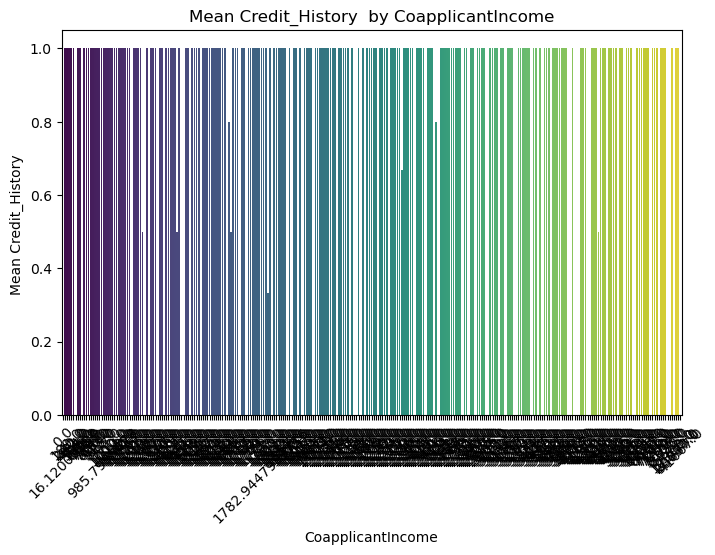


Mean Credit_History by LoanAmount:

LoanAmount
146.0    0.0
181.0    0.0
166.0    0.0
201.0    0.0
149.0    0.0
        ... 
196.0    NaN
265.0    NaN
330.0    NaN
350.0    NaN
650.0    NaN
Name: Credit_History, Length: 205, dtype: float64


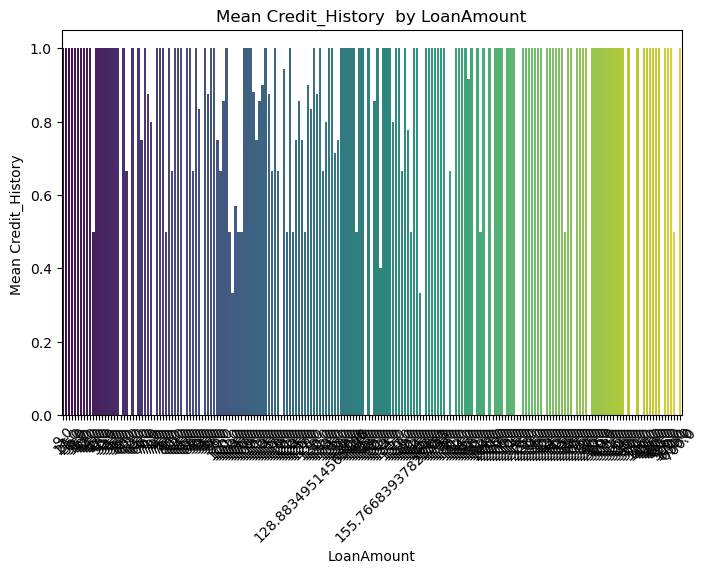


Mean Credit_History by Loan_Amount_Term:

Loan_Amount_Term
300.0    0.700000
480.0    0.714286
180.0    0.767442
360.0    0.859574
36.0     1.000000
60.0     1.000000
84.0     1.000000
120.0    1.000000
240.0    1.000000
12.0          NaN
Name: Credit_History, dtype: float64


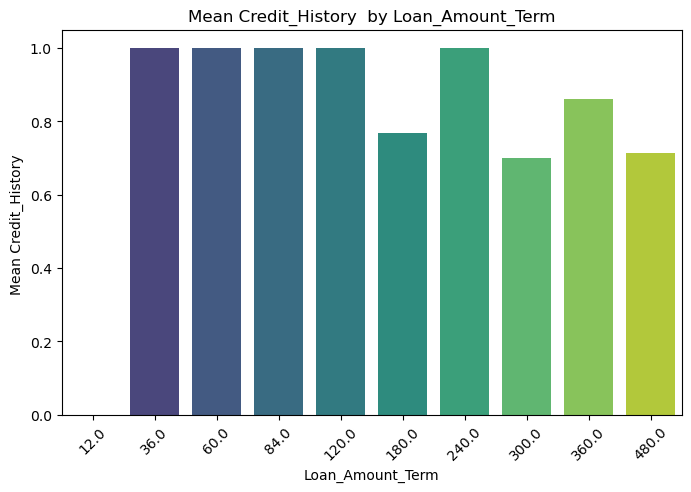


Mean Credit_History by property_Area:

property_Area
Urban        0.829670
Rural        0.830303
Semiurban    0.861751
Name: Credit_History, dtype: float64


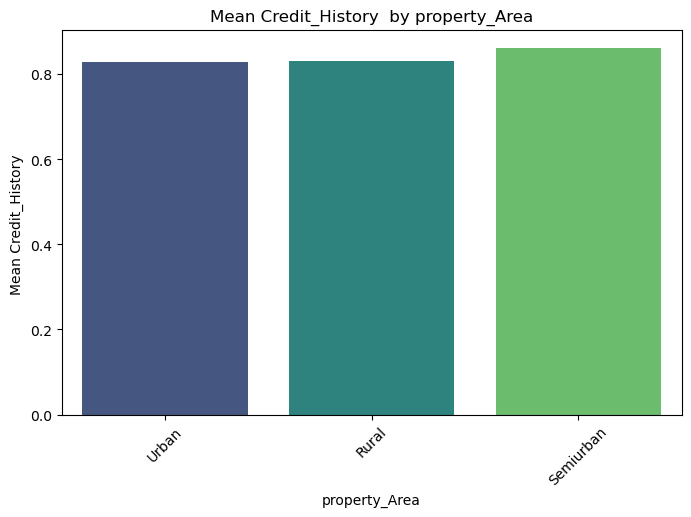


Mean Credit_History by Loan_Status:

Loan_Status
N    0.541899
Y    0.981818
Name: Credit_History, dtype: float64


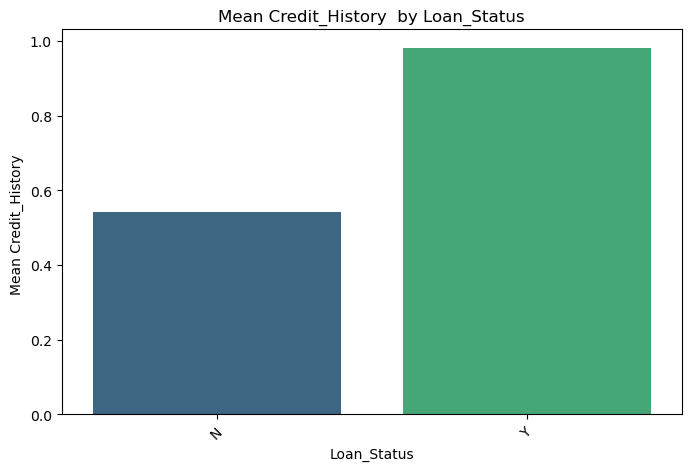

In [ ]:
# List of all columns except CoapplicantIncome
columns = [col for col in df.columns if col != 'Credit_History']

# Loop through each column and plot the mean Credit_History
for col in columns:
    mean_income = df.groupby(col)['Credit_History'].mean().sort_values()

    # Display mean values
    print(f"\nMean Credit_History by {col}:\n")
    print(mean_income)

    # Plot the mean income for each category
    plt.figure(figsize=(8, 5))
    sns.barplot(x=mean_income.index, y=mean_income.values, palette='viridis')
    plt.title(f'Mean Credit_History  by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Credit_History ')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Calculate the mode of Credit_History
mode_value = df['Credit_History'].mode()[0]

# Replace values that are not 1.0 or 0.0 with the mode
df['Credit_History'] = df['Credit_History'].apply(lambda x: mode_value if x not in [1.0, 0.0] else x)


In [ ]:
df['Credit_History'].isnull().value_counts()

Credit_History
False    614
Name: count, dtype: int64

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.000000,0.0,128.883495,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5975.930693,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.000000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.000000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.000000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
df['property_Area'].isnull().value_counts()

property_Area
False    614
Name: count, dtype: int64

In [ ]:
df['Loan_Status'].isnull().value_counts()

Loan_Status
False    614
Name: count, dtype: int64

In [ ]:
df.isnull().value_counts()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  property_Area  Loan_Status
False    False   False    False       False      False          False            False              False       False             False           False          False          614
Name: count, dtype: int64

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.000000,0.0,128.883495,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5975.930693,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.000000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.000000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.000000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.000000,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106.000000,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.000000,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.000000,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
df['Loan_Amount_Term'].isnull().value_counts()

Loan_Amount_Term
False    614
Name: count, dtype: int64

***UNIVARIATE ANALYSIS***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### GENDER

df['gender].describe()

In [ ]:
df.to_csv(r"/content/dataset.csv")

NameError: name 'df' is not defined

In [ ]:
df['Credit_History'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Credit_History
Non-Null Count  Dtype  
--------------  -----  
614 non-null    float64
dtypes: float64(1)
memory usage: 4.9 KB


In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.000000,0.0,128.883495,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5975.930693,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.000000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.000000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.000000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.000000,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106.000000,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.000000,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.000000,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
df['Gender'].describe()

count      614
unique       2
top       Male
freq       499
Name: Gender, dtype: object

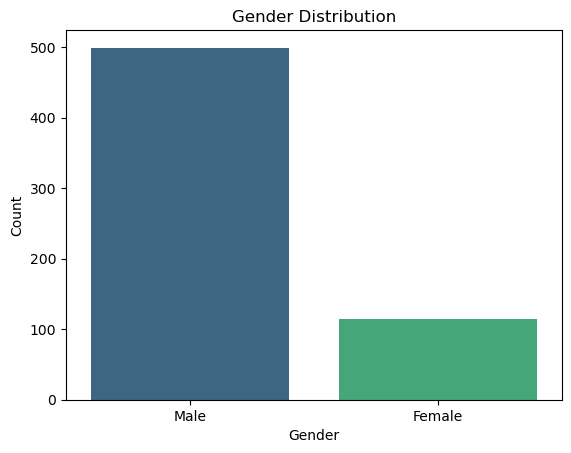

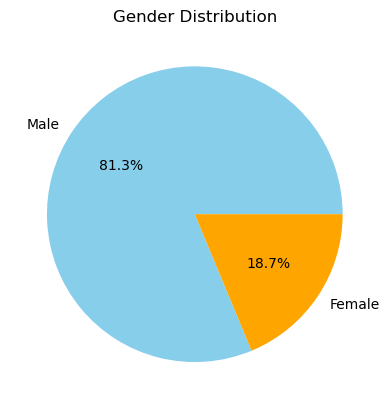

In [ ]:
sns.countplot(x='Gender',data=df,palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()



### **Gender Distribution in Loan Applicants:**

- **81.3% of Loan Applicants are Males**
- **18.7% are Females**

This reflects an **uneven representation of gender** in the loan application process, which could indicate underlying **economic**, **social**, or **cultural** factors influencing the accessibility of loans for females. Such imbalances may suggest areas for improvement in **financial inclusivity** and **equality**.


Married

In [ ]:
df['Married'].describe()

count     614
unique      2
top       Yes
freq      401
Name: Married, dtype: object

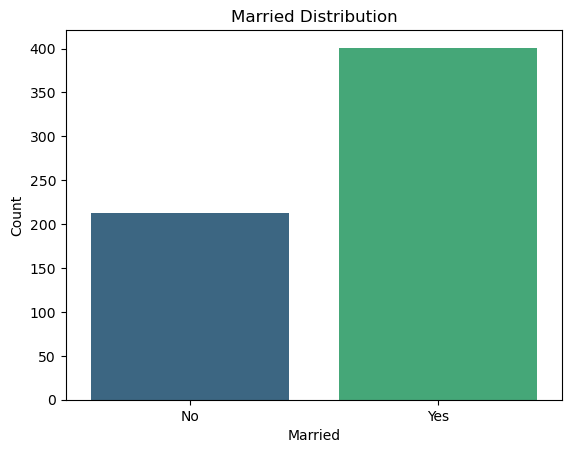

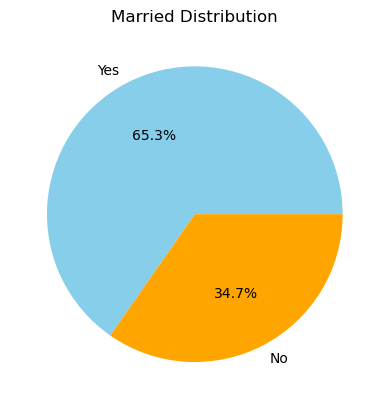

In [ ]:
sns.countplot(x='Married',data=df,palette='viridis')
plt.title('Married Distribution')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

df['Married'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Married Distribution')
plt.ylabel('')
plt.show()



### **Marriage Status Distribution Among Loan Seekers:**
- **65.3% of Loan Seekers are Married**
- **34.7% of Loan Seekers are Not Married**

This suggests that **married individuals** might be more likely to apply for loans, potentially due to:
- **Financial stability**: Married individuals may have a stronger perception of financial security or shared financial responsibilities.
- **Family-oriented goals**: Loans may be more likely sought for family-related goals like buying a house or securing education.

However, it also raises the question of whether **single or unmarried individuals** face barriers or different financial conditions when applying for loans, highlighting an area that may require further exploration in terms of financial inclusivity.


In [ ]:
def univariate_analysis(df, column_name):
    """
    Perform univariate analysis on the given column from the dataframe.
    This includes statistical summary, missing value check, and plots.

    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    column_name (str): The name of the column to analyze.
    """
    # Print the column name being analyzed
    print(f"\n--- Univariate Analysis for '{column_name}' ---\n")

    # Statistical summary for numerical columns
    if df[column_name].dtype in ['int64', 'float64']:
        print("Statistical Summary:")
        print(df[column_name].describe())
        print("\n")

        # Boxplot
        sns.boxplot(x=df[column_name], color='lightgreen')
        plt.title(f'{column_name} Boxplot')
        plt.xlabel(column_name)
        plt.show()

        # Histogram with KDE (Kernel Density Estimate)
        sns.histplot(df[column_name], kde=True, color='skyblue')
        plt.title(f'{column_name} Distribution')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

    else:
        print("Statistical Summary:")
        print(df[column_name].value_counts())
        print("\n")

        # Countplot for categorical columns
        sns.countplot(x=column_name, data=df, palette='viridis')
        plt.title(f'{column_name} Distribution')
        plt.xlabel(column_name)
        plt.ylabel('Count')
        plt.show()

        # Pie chart for categorical distribution
        df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red'])
        plt.title(f'{column_name} Distribution')
        plt.ylabel('')
        plt.show()

    # Missing value check
    missing_values = df[column_name].isnull().sum()
    print(f"Missing values in '{column_name}': {missing_values}")

    # Visualize missing values
    if df[column_name].isnull().sum() > 0:
        sns.heatmap(df[column_name].isnull().to_frame().T, cbar=False, cmap='viridis')
        plt.title(f'Missing Values in {column_name}')
        plt.show()

    # For categorical variables, also show mode
    if df[column_name].dtype in ['object']:
        mode_value = df[column_name].mode()[0]
        print(f"Mode for '{column_name}': {mode_value}")

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')


--- Univariate Analysis for 'Dependents' ---

Statistical Summary:
count    614.000000
mean       0.744300
std        1.009623
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: Dependents, dtype: float64




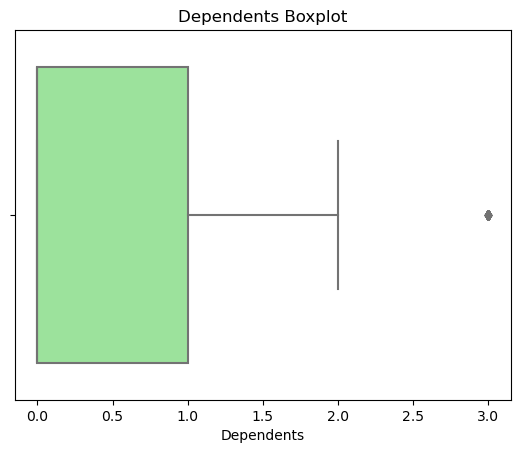

c:\Users\91628\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


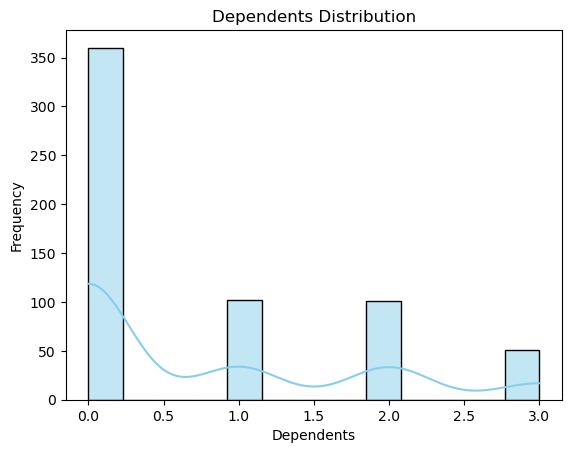

Missing values in 'Dependents': 0


In [ ]:
univariate_analysis(df, 'Dependents')


### *Dependents Distribution in Loan Applicants:*

**A significant number of loan applicants have no dependents.**  
This observation reflects that around 50% of applicants do not have dependents. This suggests that a substantial portion of loan applicants may be individuals with fewer familial responsibilities. This trend could indicate:

- A potentially **higher financial independence**, as individuals without dependents may have fewer financial obligations.
- An influence on **lending decisions**, where applicants without dependents may be perceived as having a higher capacity for loan repayment.

Such insights could point to broader **demographic or economic patterns**, such as:
- **Single-person households** or younger individuals with fewer family responsibilities.
- Possible implications on financial inclusivity or the targeting of certain demographic groups by financial institutions.



--- Univariate Analysis for 'Education' ---

Statistical Summary:
Education
Graduate        479
Not Graduate    135
Name: count, dtype: int64




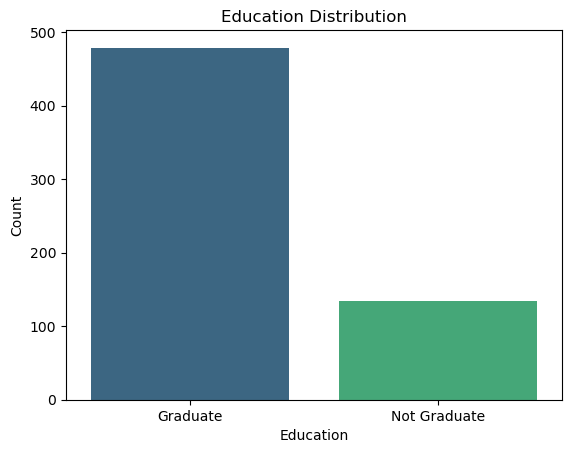

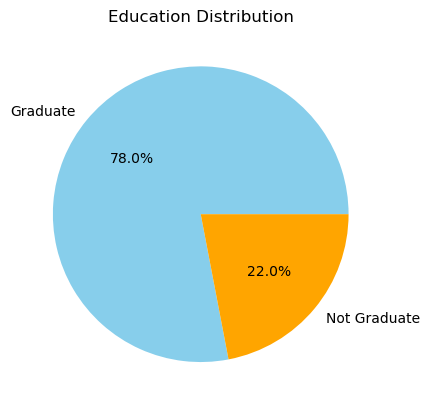

Missing values in 'Education': 0
Mode for 'Education': Graduate


In [ ]:
univariate_analysis(df, 'Education')


### *Education Level Distribution in Loan Applicants:*

**78% of Loan Applicants are Graduates.**  
This indicates that a large proportion of loan seekers have completed higher education, which could suggest:

- **Higher employability** and potentially **better earning capacity**, as graduates often have access to higher-paying jobs.
- A potential link between **education level** and **financial stability**, where graduates may be perceived as more financially responsible or capable of repaying loans.

This trend could also reflect **demographic and social factors**, such as:
- **Access to education** in the population and its impact on loan approval processes.
- **Economic patterns**, where higher educational attainment may correlate with better financial standing or lending opportunities.



--- Univariate Analysis for 'Self_Employed' ---

Statistical Summary:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64




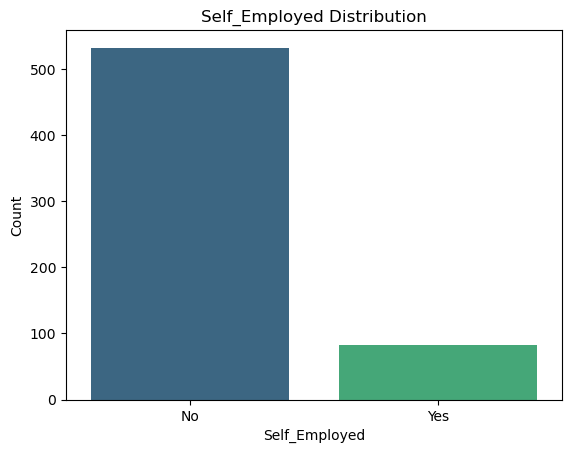

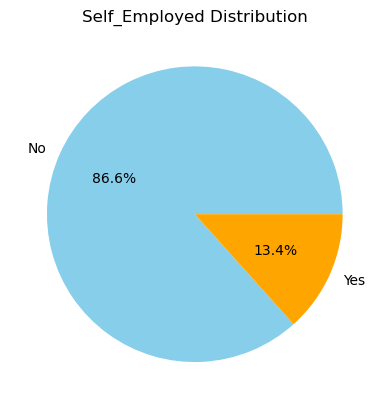

Missing values in 'Self_Employed': 0
Mode for 'Self_Employed': No


In [ ]:
univariate_analysis(df, 'Self_Employed')


### *Employment Status Distribution in Loan Applicants:*

**Only 13.4% of Loan Applicants are Self-Employed.**  
This indicates that a relatively small portion of loan seekers are self-employed, which could suggest:

- **Lower perceived stability**: Financial institutions may view salaried individuals as having more consistent income streams, making them a safer choice for lending.
- **Potential challenges in loan approval**: Self-employed individuals might face more scrutiny, with institutions possibly requiring more detailed documentation to verify income and business stability.

This trend could also reflect **broader employment and economic patterns**, such as:
- A **preference for stable employment** over entrepreneurial ventures in the loan approval process.
- The **challenges** that self-employed individuals face in terms of **financial documentation** and **income volatility** compared to salaried individuals.



--- Univariate Analysis for 'ApplicantIncome' ---

Statistical Summary:
count      614.000000
mean      5405.693081
std       6108.997793
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5811.250000
max      81000.000000
Name: ApplicantIncome, dtype: float64




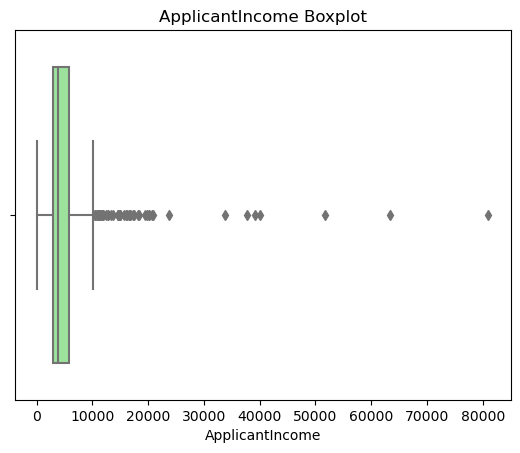

c:\Users\91628\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


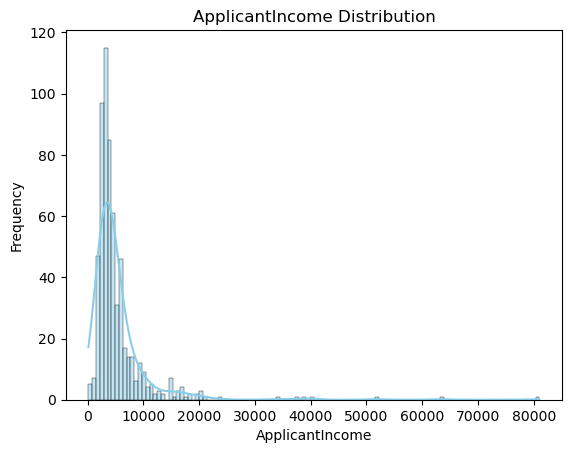

Missing values in 'ApplicantIncome': 0


In [ ]:
univariate_analysis(df, 'ApplicantIncome')


### *Applicant Income Distribution in Loan Applicants:*

The **ApplicantIncome** is **right-skewed** with a considerable number of **outliers**.

#### Statistical Summary:
- **Count**: 614
- **Mean**: ₹540500.69
- **Standard Deviation**: ₹610800.99
- **Minimum**: ₹15000
- **25th Percentile (Q1)**: ₹287700.50
- **50th Percentile (Median)**: ₹381200.50
- **75th Percentile (Q3)**: ₹581100.25
- **Maximum**: ₹81,000,00

#### Observations:
- The **mean** is significantly higher than the **median**, indicating a **right skew** in the data, meaning a few individuals earn much higher incomes, pulling the mean upwards.
- The **standard deviation** is quite large, reflecting a **high variability** in income across applicants.
- The **presence of outliers** is evident, particularly with the **maximum income** of ₹81,000, which is much higher than most of the applicants.
  
#### Implications:
- **Loan assessment** could be influenced by income distribution, where applicants with very high incomes might be treated differently in terms of loan eligibility or interest rates.
- The right skew and outliers suggest that most applicants fall within the lower to mid-income range, with a few individuals having disproportionately high incomes.

Visualizing this distribution can provide further insights into the income spread and the influence of outliers.


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')


--- Univariate Analysis for 'CoapplicantIncome' ---

Statistical Summary:
count      341.000000
mean      2919.025996
std       3411.557746
min         16.120001
25%       1644.000000
50%       2166.000000
75%       3230.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64




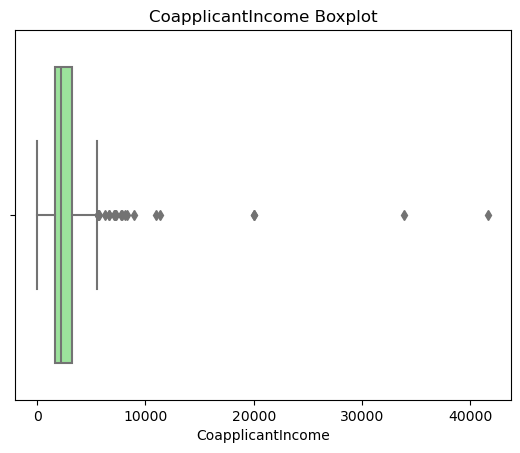

c:\Users\91628\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


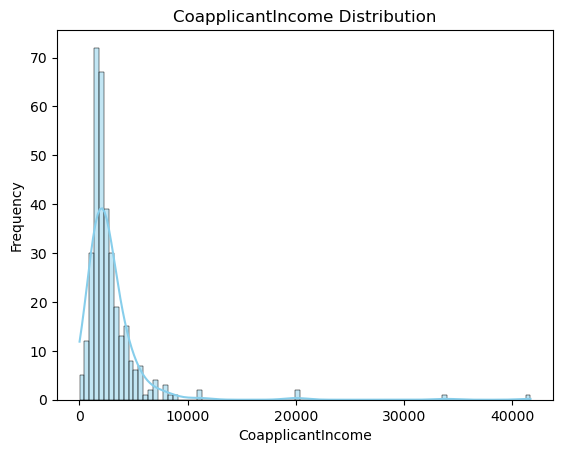

Missing values in 'CoapplicantIncome': 0


In [ ]:
univariate_analysis(df[df['CoapplicantIncome']!=0.0], 'CoapplicantIncome')


### *Co-applicant Income Summary:*

- **Mean:** 2919.03  
   On average, the co-applicant income is ₹2919.03, indicating that most co-applicants earn around this amount.

- **Standard Deviation (std):** 3411.56  
   The large standard deviation indicates significant variation in the co-applicant income across the dataset. This suggests that co-applicants have highly diverse income levels, with some earning very low amounts and others earning much higher amounts.

- **Minimum:** 16.12  
   The minimum value is ₹16.12, which indicates that there may be some co-applicants with very low or almost no income. This could reflect anomalies or cases where income reporting was missing or misinterpreted.

- **25th Percentile (25%):** 1644.00  
   25% of the co-applicants earn less than ₹1644. This shows that a quarter of co-applicants have a relatively low income compared to the overall distribution.

- **50th Percentile (Median):** 2166.00  
   The median income of ₹2166 means that half of the co-applicants earn less than this value, while the other half earn more. This is a better representation of the "typical" co-applicant income as it is less affected by extreme outliers.

- **75th Percentile (75%):** 3230.00  
   75% of the co-applicants earn less than ₹3230. This indicates that a significant portion of co-applicants has moderate to lower earnings, but the remaining 25% earn higher than this value.

- **Maximum:** 41667.00  
   The maximum value of ₹41667 shows that some co-applicants earn relatively high amounts, potentially indicating business owners, executives, or people in high-income professions.

### **Insights:**
- **Skewed Distribution:**  
   Given the large gap between the 25th percentile (₹1644) and maximum (₹41667), it is likely that **Co-applicant Income is right-skewed**. This means there are some high-income co-applicants that distort the average, while the majority of co-applicants earn a moderate to low income.

- **Financial Impact:**  
   The wide range of co-applicant income implies that some applicants may rely heavily on co-applicants with higher incomes to qualify for loans. In contrast, co-applicants with very low or no income could raise concerns for lenders regarding the applicant's ability to repay the loan, even if the primary applicant has a stable income.

- **Risk of Outliers:**  
   The large standard deviation and presence of high-income co-applicants (₹41667) suggest that **outliers** could influence the overall loan approval process, particularly if loan eligibility is based on the combined applicant and co-applicant income.

- **Loan Qualification:**  
   For lenders, the variability in co-applicant income must be assessed carefully. High-income co-applicants could lead to better loan terms and higher loan amounts, while low-income co-applicants could present a higher risk, especially if the applicant's income is also modest.

#### **Conclusion:**
The **Co-applicant Income** distribution suggests a mix of financial situations, with some co-applicants significantly boosting the applicant's financial standing, while others may not contribute much. This variability must be considered in loan assessments, particularly when evaluating the overall loan repayment capability.


### *Co-applicant Income and Its Impact on Loan Dynamics:*

#### **Co-applicant Income's Role in Loan Approval:**
- **Higher Loan Eligibility:**  
   Co-applicant income plays a critical role in **increasing loan eligibility**. Financial institutions often consider the combined income of both the applicant and co-applicant. A higher co-applicant income increases the total household income, improving the likelihood of meeting income requirements and making it easier for applicants to qualify for larger loan amounts or more favorable loan terms.

- **Risk Mitigation for Lenders:**  
   Co-applicant income serves as a safety net for lenders. In cases where the primary applicant faces financial hardship, the co-applicant’s income can help continue the repayment process. Therefore, lenders are more likely to approve loans with co-applicants, especially if the co-applicant has a stable and reliable income.

#### **Dynamic Influence on Loan Terms:**
- **Impact on Loan Amount and Interest Rates:**  
   A higher co-applicant income can also affect the **amount** of loan sanctioned and the **interest rate** charged. Banks may offer larger loans to applicants with higher co-applicant incomes, as this signals a higher repayment potential. Furthermore, this can also lead to more favorable **interest rates**, as the perceived risk of default is reduced.

- **Debt-to-Income Ratio (DTI):**  
   Financial institutions typically use the **Debt-to-Income (DTI)** ratio to assess an applicant’s ability to repay the loan. A higher co-applicant income reduces the DTI ratio, making it more likely that the loan will be approved. If the applicant's DTI is too high, the lender might use the co-applicant’s income to lower it to an acceptable level.

#### **Potential Drawbacks or Negative Impacts:**
- **Over-dependence on Co-applicant Income:**  
   Relying heavily on co-applicant income may create issues if there are discrepancies in the financial stability of the co-applicant. If the co-applicant’s income is volatile or irregular, it could increase the **risk of default**, affecting both the primary applicant and the co-applicant. This is particularly important in cases where the co-applicant's income is high but inconsistent (e.g., irregular freelance work or variable business income).

- **Impact on Loan Approval Dynamics in Case of Default:**  
   In case of loan default, both the primary applicant and co-applicant share the responsibility for repayment. Financial institutions may approach both individuals for repayment, and if one of them defaults, it could impact both parties’ credit histories. For this reason, having a co-applicant with a **stable and reliable income** is vital in ensuring smooth repayment.

#### **Socioeconomic and Demographic Implications:**
- **Access to Financial Products:**  
   In many cases, co-applicants help individuals from lower-income or economically disadvantaged backgrounds access financial products. This could include self-employed individuals or people with irregular income who may not qualify for loans alone. Co-applicants can help bridge the gap in financial stability and increase financial inclusion.

- **Dependence on Household Income:**  
   Co-applicant income may reflect broader **household economic status**. If an applicant has to rely on a co-applicant, this might indicate a **shared financial responsibility** within the family or household. Banks might see this as a sign of a more **stable family income**.

#### **Conclusion:**
In summary, co-applicant income plays a significant role in the **loan approval process**, improving eligibility and reducing perceived risk for financial institutions. However, the dynamics of relying on co-applicants must be carefully considered, especially in terms of financial stability and the potential impact on both parties in case of default.



--- Univariate Analysis for 'LoanAmount' ---

Statistical Summary:
count    614.000000
mean     146.440858
std       84.071072
min        9.000000
25%      100.250000
50%      128.883495
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64




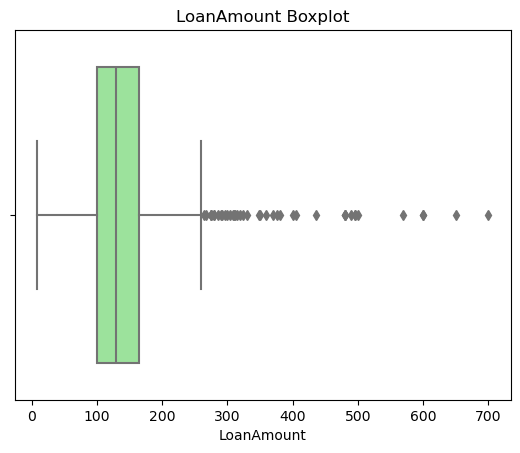

c:\Users\91628\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


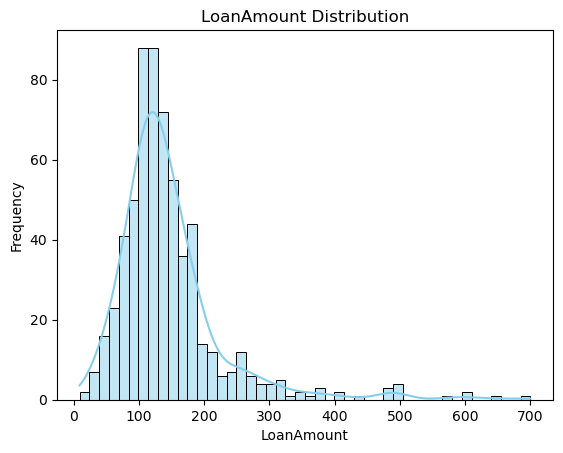

Missing values in 'LoanAmount': 0


In [ ]:
univariate_analysis(df, 'LoanAmount')


### *Loan Amount Requested Summary:*

- **Mean:** 146.44  
   On average, loan applicants request ₹146,440. This suggests that most loan applicants are seeking a relatively modest loan amount, with some outliers requesting much higher amounts.

- **Standard Deviation (std):** 84.07  
   The standard deviation of ₹84,071 indicates a high level of variability in the loan amount requested. This suggests that applicants' loan needs vary widely, with some seeking small amounts and others requesting significantly higher amounts.

- **Minimum:** 9.00  
   The minimum loan amount requested is ₹9,000. This might represent either an unusual, very small loan request or could be a data anomaly, suggesting the need for further validation.

- **25th Percentile (25%):** 100.25  
   25% of applicants request less than ₹100,250. This shows that a quarter of applicants are seeking relatively smaller loan amounts.

- **50th Percentile (Median):** 128.88  
   The median loan amount is ₹128,883, meaning that half of the applicants request more than this amount, and half request less. This is a more typical loan amount for the dataset, providing a better understanding of the "central" loan request.

- **75th Percentile (75%):** 164.75  
   75% of applicants request less than ₹164,750. This indicates that the majority of applicants request moderate to higher amounts, but the remaining 25% request larger sums.

- **Maximum:** 700.00  
   The maximum loan amount requested is ₹700,000, which is significantly higher than most of the other loan requests. This could reflect cases where applicants seek larger loans for specific purposes, such as business or property investments.

### **Insights:**
- **Skewed Distribution:**  
   The difference between the 25th percentile (₹100,250) and maximum (₹700,000) suggests that **Loan Amount Requested is right-skewed**. While most applicants request modest amounts, there are some applicants with very large loan requests that stretch the distribution to the right.

- **Loan Requirements and Risk:**  
   High standard deviation and large variation in requested loan amounts suggest that lenders may need to customize their loan eligibility criteria. Applicants requesting large loan amounts might be more risky, while those requesting smaller amounts might be more manageable from a financial perspective.

- **Potential Outliers:**  
   With a minimum loan amount of ₹9,000 and a maximum of ₹700,000, there could be significant **outliers** in the data. Extreme loan requests might require further investigation to ensure the loan applications are legitimate and meet the required conditions.

- **Loan Approval Impact:**  
   The skewed nature of loan requests implies that the loan amounts most applicants request are moderate, but there is a subset of high-value requests that could heavily impact the bank's or lender's ability to meet demand and balance risk.

#### **Conclusion:**
The **Loan Amount Requested** distribution highlights that most loan seekers request moderate loan amounts, with a few seeking significantly higher sums. Lenders need to assess these varying loan amounts carefully, as larger loans could imply greater financial risk, especially when there is considerable income variability among applicants.


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')


--- Univariate Analysis for 'Loan_Amount_Term' ---

Statistical Summary:
count    614.000000
mean     342.410423
std       64.428629
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64




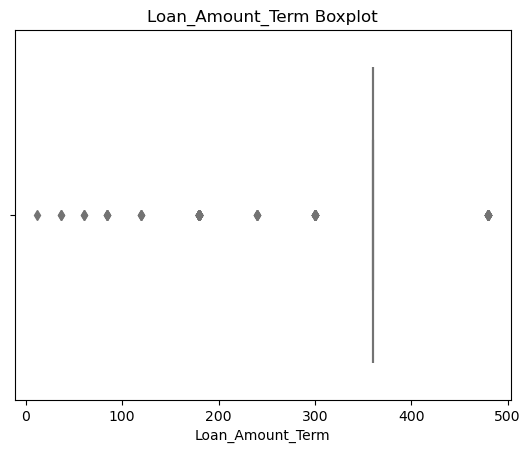

c:\Users\91628\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


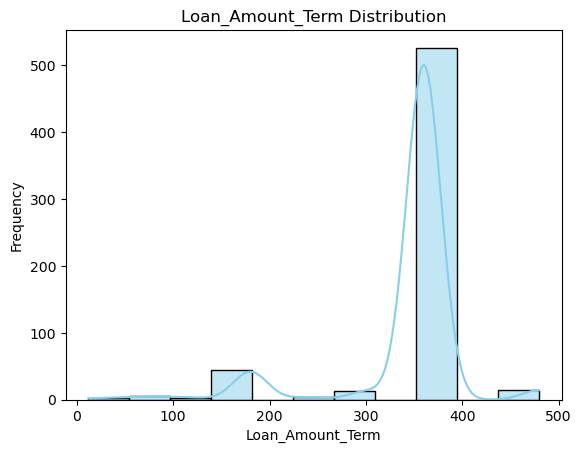

Missing values in 'Loan_Amount_Term': 0


In [ ]:
univariate_analysis(df, 'Loan_Amount_Term')


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')


--- Univariate Analysis for 'Credit_History' ---

Statistical Summary:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64




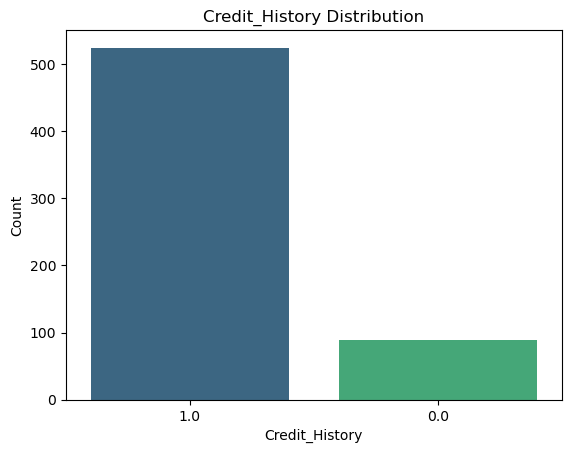

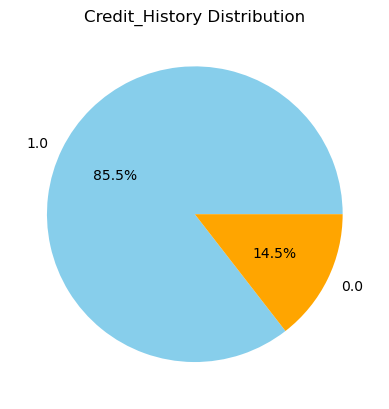

Missing values in 'Credit_History': 0
Mode for 'Credit_History': 1.0


In [ ]:
univariate_analysis(df, 'Credit_History')


### *Credit History Summary:*

- **Credit History 1.0 (Good Credit):** 525 applicants (majority)
- **Credit History 0.0 (Poor Credit):** 89 applicants

### **Insights:**
- **Dominance of Good Credit:** The data indicates that the majority of loan applicants have a good credit history, suggesting stronger eligibility.
- **Risk Factors:** A smaller portion of applicants with poor credit (17%) might face higher interest rates or loan rejections.

### **Conclusion:**  
The predominance of good credit history among applicants reflects a higher likelihood of loan approvals, reducing overall lending risks for institutions.


In [ ]:
df['Credit_History']=df['Credit_History'].astype(str)


--- Univariate Analysis for 'property_Area' ---

Statistical Summary:
property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64




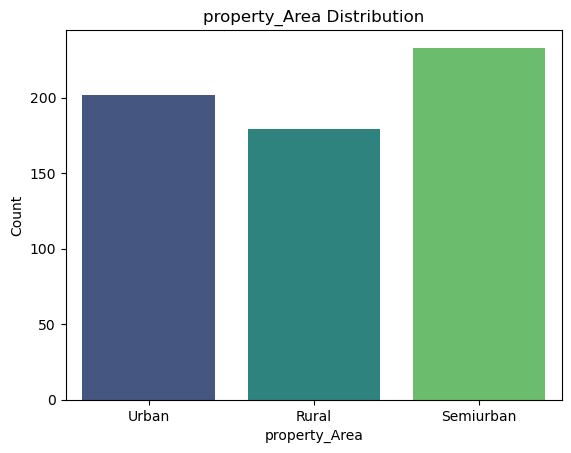

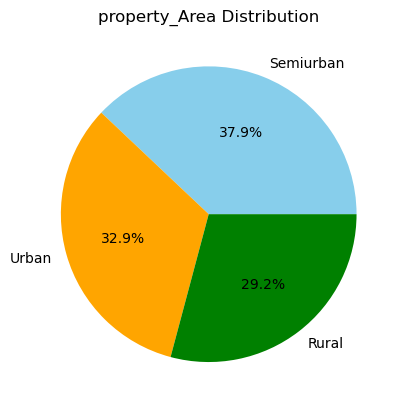

Missing values in 'property_Area': 0
Mode for 'property_Area': Semiurban


In [ ]:
univariate_analysis(df,'property_Area')

### *Property Area Distribution:*

- **Semiurban:** 233 applicants (37.9%)  
- **Urban:** 202 applicants (32.9%)  
- **Rural:** 179 applicants (29.2%)  

### **Insights:**
- **Preference for Semiurban Areas:** The majority of loan applications are from **semiurban areas**, indicating a growing financial activity and demand for loans in these regions, likely due to expanding residential and commercial development.
- **Urban and Rural Split:** Urban areas account for the second-highest number of applications, reflecting higher income levels and property value. Meanwhile, **rural areas** form a smaller share, possibly due to limited access to financial services or smaller loan amounts being requested.

### **Conclusion:**  
The property area distribution showcases a significant share of applications from **semiurban areas**, reflecting their increasing prominence in the loan market. This trend highlights the need for tailored financial products catering to diverse geographic and socioeconomic groups.



--- Univariate Analysis for 'Loan_Status' ---

Statistical Summary:
Loan_Status
Y    422
N    192
Name: count, dtype: int64




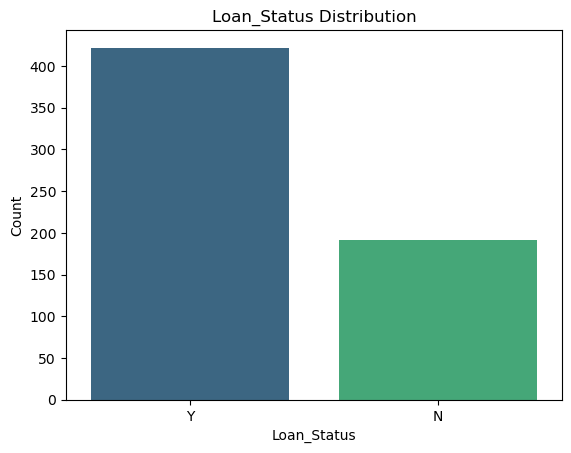

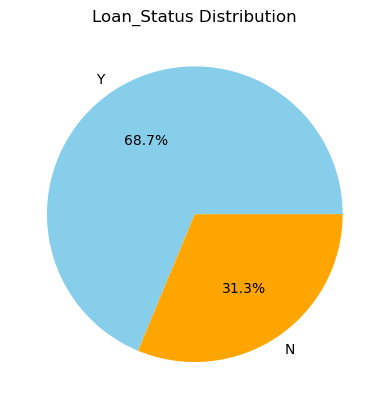

Missing values in 'Loan_Status': 0
Mode for 'Loan_Status': Y


In [ ]:
univariate_analysis(df,'Loan_Status')

In [ ]:
df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df=pd.read_csv('/content/dataset.csv')

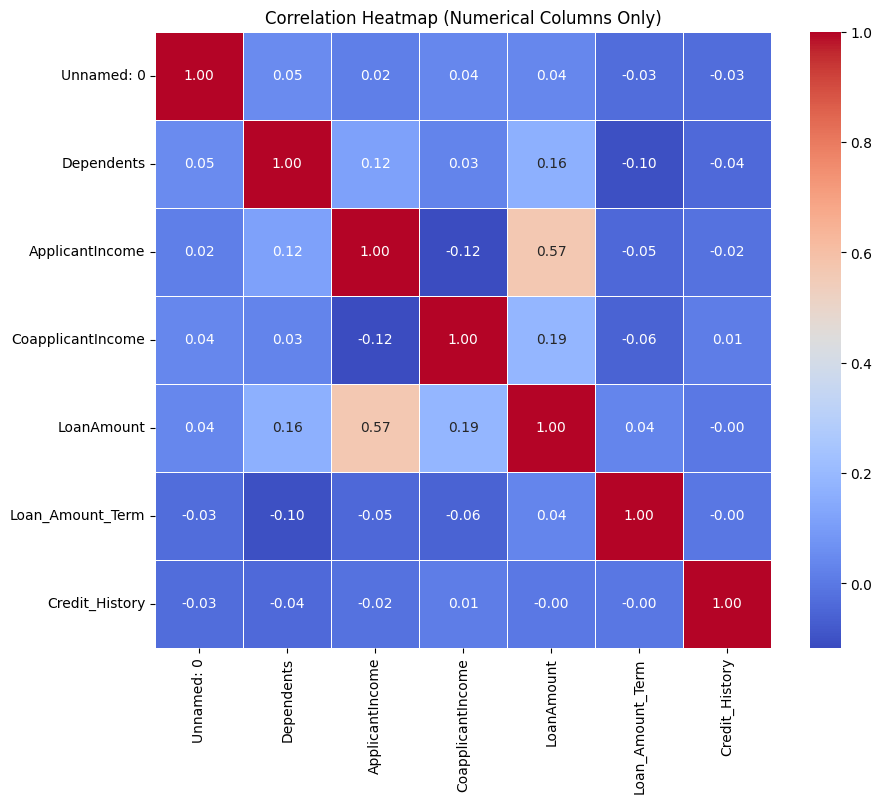

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Step 1: Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Step 2: Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Step 3: Set up the plot
plt.figure(figsize=(10, 8))  # Adjust figure size as needed

# Step 4: Plot the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,       # Annotate the correlation values on the heatmap
    cmap='coolwarm',  # Choose a color palette
    fmt='.2f',        # Format the correlation coefficients to two decimal places
    linewidths=0.5,   # Add gridlines
    square=True       # Make the heatmap square-shaped
)

# Step 5: Add a title
plt.title('Correlation Heatmap (Numerical Columns Only)')

# Step 6: Display the heatmap
plt.show()


## **Significant Relationships **
LoanAmount and ApplicantIncome:

Correlation: 0.566
Interpretation: Higher applicant incomes are strongly associated with higher loan amounts.
LoanAmount and Dependents (Moderate significance):

Correlation: 0.164
Interpretation: Larger family sizes have a moderate positive influence on loan amounts.
Other correlations are below the threshold of 0.5 and can be considered weak or negligible.

In [ ]:
correlation_matrix

,Unnamed: 0,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Unnamed: 0,1.000000,0.051559,0.016294,0.039264,0.036943,-0.033028,-0.030603
Dependents,0.051559,1.000000,0.118301,0.030390,0.163598,-0.103864,-0.040160
ApplicantIncome,0.016294,0.118301,1.000000,-0.116602,0.565762,-0.046431,-0.018465
CoapplicantIncome,0.039264,0.030390,-0.116602,1.000000,0.188341,-0.059392,0.011121
LoanAmount,0.036943,0.163598,0.565762,0.188341,1.000000,0.035201,-0.001870
Loan_Amount_Term,-0.033028,-0.103864,-0.046431,-0.059392,0.035201,1.000000,-0.004705
Credit_History,-0.030603,-0.040160,-0.018465,0.011121,-0.001870,-0.004705,1.000000


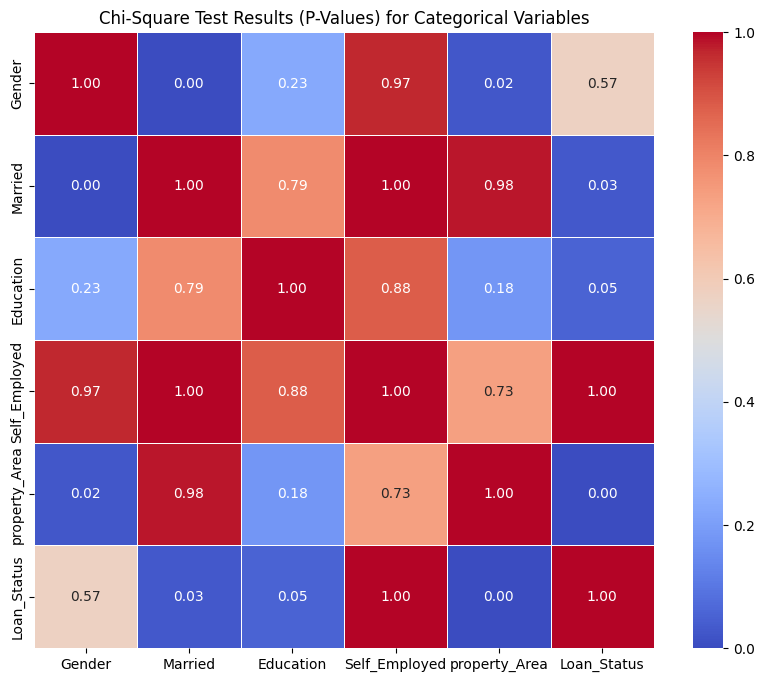

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Example: Assuming `df` is your DataFrame and these are the categorical columns
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'property_Area','Loan_Status']

# Create a heatmap of chi-square p-values for categorical relationships
chi_square_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            chi_square_results.loc[col1, col2] = p
        else:
            chi_square_results.loc[col1, col2] = 1  # Perfect relationship

# Convert to numeric for visualization
chi_square_results = chi_square_results.astype(float)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(chi_square_results, annot=True, cmap='coolwarm', cbar=True,
            fmt='.2f', linewidths=0.5, xticklabels=categorical_columns, yticklabels=categorical_columns)
plt.title('Chi-Square Test Results (P-Values) for Categorical Variables')
plt.show()


# **Significant Relationships in Categorical Columns**
# Gender and Married:

p-value =
7.500969
×
1
0
−
18
7.500969×10
−18

Interpretation: Gender and marital status are strongly related, suggesting that gender significantly influences marital status distribution.
# Gender and Property_Area:

p-value =
0.024072
0.024072
Interpretation: There is a significant relationship between gender and the property area, indicating differences in property area distribution based on gender.

In [ ]:
chi_square_results

,Gender,Married,Education,Self_Employed,property_Area,Loan_Status
Gender,1.000000e+00,7.500969e-18,0.232050,0.965633,0.024072,0.571032
Married,7.500969e-18,1.000000e+00,0.785057,1.000000,0.983494,0.029609
Education,2.320502e-01,7.850569e-01,1.000000,0.879483,0.177832,0.050984
Self_Employed,9.656326e-01,1.000000e+00,0.879483,1.000000,0.733485,1.000000
property_Area,2.407201e-02,9.834938e-01,0.177832,0.733485,1.000000,0.002136
Loan_Status,5.710323e-01,2.960858e-02,0.050984,1.000000,0.002136,1.000000


# Significant Relationships in Categorical Variables (with Influence)

## 1. Gender and Married
- **p-value:** \(7.500969 \times 10^{-18}\)
- **Influence:** Gender distribution significantly correlates with marital status. For instance, married applicants might predominantly belong to a specific gender, like males.

## 2. Gender and Property_Area
- **p-value:** 0.024072
- **Influence:** Gender influences the type of property area applicants prefer. Male applicants might prefer urban areas, while females lean towards semi-urban or rural areas.

## 3. Married and Loan_Status
- **p-value:** 0.029609
- **Influence:** Marital status significantly affects loan approval. Married applicants may have higher approval rates due to combined incomes or perceived financial stability.

## 4. Property_Area and Loan_Status
- **p-value:** 0.002136
- **Influence:** Property area affects loan approval. Urban areas might see higher approval rates, while rural areas may experience higher rejections.


In [ ]:
means = df.groupby('Loan_Status')[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].mean()
print(means)


             ApplicantIncome  CoapplicantIncome  LoanAmount
Loan_Status                                                
N                5453.332972        1877.807292  150.921364
Y                5384.018060        1504.381196  144.402335


In [ ]:
from scipy.stats import ttest_ind


In [ ]:
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in numerical_cols:
    group_Y = df[df['Loan_Status'] == 'Y'][col]
    group_N = df[df['Loan_Status'] == 'N'][col]
    t_stat, p_value = ttest_ind(group_Y, group_N, nan_policy='omit')
    print(f"{col}: T-statistic = {t_stat}, P-value = {p_value}")


ApplicantIncome: T-statistic = -0.1302359428881017, P-value = 0.8964225532139019
CoapplicantIncome: T-statistic = -1.4673208673316116, P-value = 0.14280248372249446
LoanAmount: T-statistic = -0.8906062180125869, P-value = 0.3734904384066863


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your dataframe and 'target_column' is your target column name.
target_column = 'Loan_Status'  # Update this with your actual target column name

# Splitting the data into features (X) and target (y)
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Train-Test Split (80% training, 20% testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Validation Split (20% of training data is used as validation)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
df=df.drop(columns=['Unnamed: 0','Loan_ID'])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
def preprocess_data(df):
    df = df.copy()

    # Fill missing values
    df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
    df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

    # Encoding categorical variables
    label_encoder = LabelEncoder()
    for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'property_Area', 'Loan_Status']:
        df[col] = label_encoder.fit_transform(df[col])

    # Feature-target split
    X = df.drop('Loan_Status', axis=1)
    y = df['Loan_Status']

    # Scaling numerical features
    scaler = StandardScaler()
    X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = scaler.fit_transform(
        X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
    )

    return X, y

X, y = preprocess_data(df)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Function to evaluate model and show detailed results (Confusion Matrix, ROC Curve, Accuracy)
def evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test):
    """
    Evaluates a machine learning model and prints various performance metrics for training, validation, and test sets.
    """
    print(f"\nEvaluating {model.__class__.__name__} Model\n")

    # Training metrics
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    print(f"Training Accuracy: {train_acc:.4f} ({len(X_train)} samples)")
    print("Training Classification Report:\n", classification_report(y_train, y_pred_train))

    # Validation metrics
    y_pred_val = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_pred_val)
    print(f"Validation Accuracy: {val_acc:.4f} ({len(X_val)} samples)")
    print("Validation Classification Report:\n", classification_report(y_val, y_pred_val))

    # Testing metrics
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(f"Testing Accuracy: {test_acc:.4f} ({len(X_test)} samples)")
    print("Testing Classification Report:\n", classification_report(y_test, y_pred_test))

    # Confusion matrices for Training, Validation, and Test data
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_val = confusion_matrix(y_val, y_pred_val)
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Plotting confusion matrices
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix (Train Data)')

    plt.subplot(132)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix (Validation Data)')

    plt.subplot(133)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix (Test Data)')

    plt.tight_layout()
    plt.show()

    # ROC Curve and AUC score for Testing data
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        print(f"ROC AUC Score (Test Data): {auc:.4f}")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model.__class__.__name__} ROC Curve (Test Data)')
        plt.legend()
        plt.show()

# Define the GridSearchCV tuning and evaluation for each model

# 1. Logistic Regression
def logistic_regression_tuned(X_train, X_val, X_test, y_train, y_val, y_test):
    param_grid = {
        'C': [0.1, 1, 10,0.01,100],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [100, 200]
    }
    model = LogisticRegression(max_iter=2000)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    evaluate_model(best_model, X_train, X_val, X_test, y_train, y_val, y_test)
    # Save the best model to a .pkl file
    with open('lr.pkl', 'wb') as f:
      pickle.dump(best_model, f)

# 2. Decision Tree Classifier
def decision_tree_tuned(X_train, X_val, X_test, y_train, y_val, y_test):
    param_grid = {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = DecisionTreeClassifier()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    evaluate_model(best_model, X_train, X_val, X_test, y_train, y_val, y_test)
    # Save the best model to a .pkl file
    with open('dt.pkl', 'wb') as f:
      pickle.dump(best_model, f)

# 3. Random Forest Classifier
def random_forest_tuned(X_train, X_val, X_test, y_train, y_val, y_test):
    param_grid = {
    'n_estimators': np.arange(50, 1001, 50),  # Values from 50 to 1000, step size of 50
    'max_depth': [None, 5],  # Expanded range of max_depth
    'min_samples_split': [2],  # Added more values for min_samples_split
    'min_samples_leaf': [2, 4]  # Added more values for min_samples_leaf
}
    model = RandomForestClassifier()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    evaluate_model(best_model, X_train, X_val, X_test, y_train, y_val, y_test)
    import joblib
    joblib.dump(best_model, 'random_forest_model.pkl')
    print("Model has been saved as 'random_forest_model.pkl'")
    # Save the best model to a .pkl file
    with open('rf.pkl', 'wb') as f:
      pickle.dump(best_model, f)


# 4. Support Vector Machine (SVM)
def svm_tuned(X_train, X_val, X_test, y_train, y_val, y_test):
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
    model = SVC(probability=True)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    evaluate_model(best_model, X_train, X_val, X_test, y_train, y_val, y_test)
    with open('svm.pkl', 'wb') as f:
      pickle.dump(best_model, f)

# 5. K-Nearest Neighbors (KNN)
def knn_tuned(X_train, X_val, X_test, y_train, y_val, y_test):
    param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }
    model = KNeighborsClassifier()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    evaluate_model(best_model, X_train, X_val, X_test, y_train, y_val, y_test)
    with open('knn.pkl', 'wb') as f:
      pickle.dump(best_model, f)

# 6. Naive Bayes
def naive_bayes_tuned(X_train, X_val, X_test, y_train, y_val, y_test):
    param_grid = {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }
    model = GaussianNB()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    evaluate_model(best_model, X_train, X_val, X_test, y_train, y_val, y_test)
    with open('nvc.pkl', 'wb') as f:
      pickle.dump(best_model, f)

# 7. Gradient Boosting Classifier
def gradient_boosting_tuned(X_train, X_val, X_test, y_train, y_val, y_test):
    param_grid = {
        'n_estimators': [50, 100,200,500],
        'learning_rate': [0.05, 0.1, 0.2,0.6],
        'max_depth': [3, 5, 7]
    }
    model = GradientBoostingClassifier()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    evaluate_model(best_model, X_train, X_val, X_test, y_train, y_val, y_test)
    with open('gb.pkl', 'wb') as f:
      pickle.dump(best_model, f)

# 8. XGBoost Classifier


# 9. AdaBoost Classifier
def adaboost_tuned(X_train, X_val, X_test, y_train, y_val, y_test):
    param_grid = {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 1]
    }
    model = AdaBoostClassifier()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    evaluate_model(best_model, X_train, X_val, X_test, y_train, y_val, y_test)
    with open('ab.pkl', 'wb') as f:
      pickle.dump(best_model, f)


# Example usage for each model (you should call each function with the appropriate data):
# logistic_regression_tuned(X_train, X_val, X_test, y_train, y_val, y_test)
# decision_tree_tuned(X_train, X_val, X_test, y_train, y_val, y_test)
# (repeat for other models)
def mlp_tuned(X_train, X_val, X_test, y_train, y_val, y_test):
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (150,)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd'],
        'max_iter': [200, 300, 500]
    }
    model = MLPClassifier()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    evaluate_model(best_model, X_train, X_val, X_test, y_train, y_val, y_test)
    with open('mlp.pkl', 'wb') as f:
      pickle.dump(best_model, f)


<ipython-input-43-a2c5a00e55fb>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
<ipython-input-43-a2c5a00e55fb>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
import pickle

# Load the model
model_filepath = 'lr.pkl'

with open(model_filepath, 'rb') as file:
    model = pickle.load(file)

# Check the type of the model
print(f"The type of the model is: {type(model)}")


The type of the model is: <class 'sklearn.linear_model._logistic.LogisticRegression'>


Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}

Evaluating RandomForestClassifier Model

Training Accuracy: 0.8322 (429 samples)
Training Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.47      0.62       127
           1       0.82      0.98      0.89       302

    accuracy                           0.83       429
   macro avg       0.87      0.73      0.76       429
weighted avg       0.85      0.83      0.81       429

Validation Accuracy: 0.8152 (92 samples)
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.51      0.68        35
           1       0.77      1.00      0.87        57

    accuracy                           0.82        92
   macro avg       0.89      0.76      0.77        92
weighted avg       0.86      0.82      0.80        92

Testing Accuracy: 0.7634 (93 samples)
Testing Class

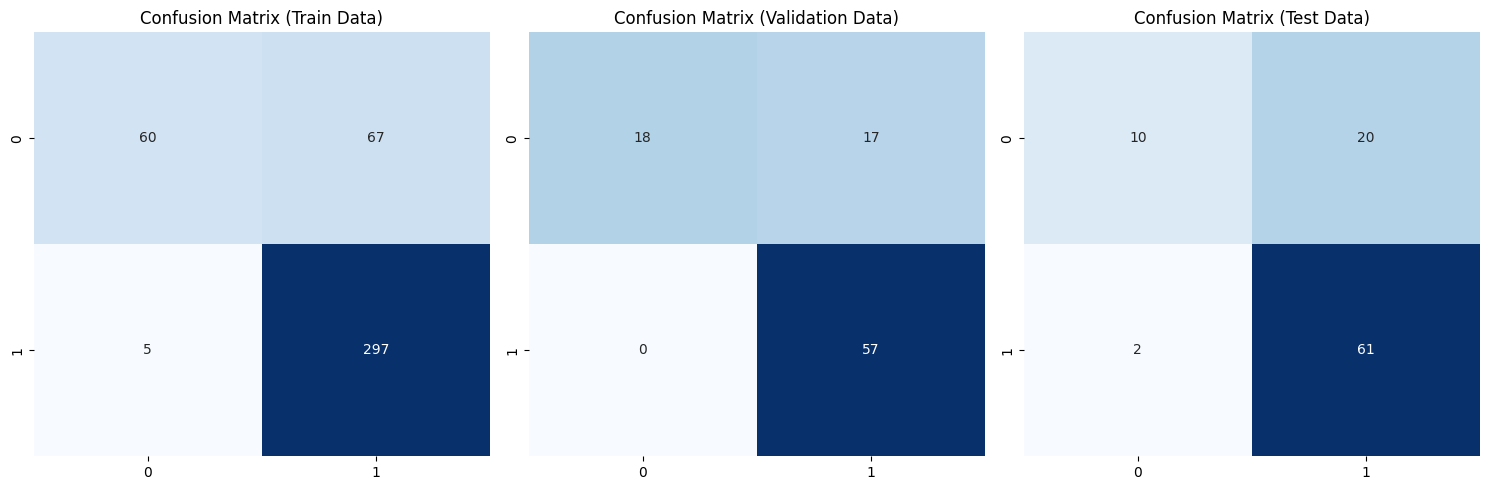

ROC AUC Score (Test Data): 0.7365


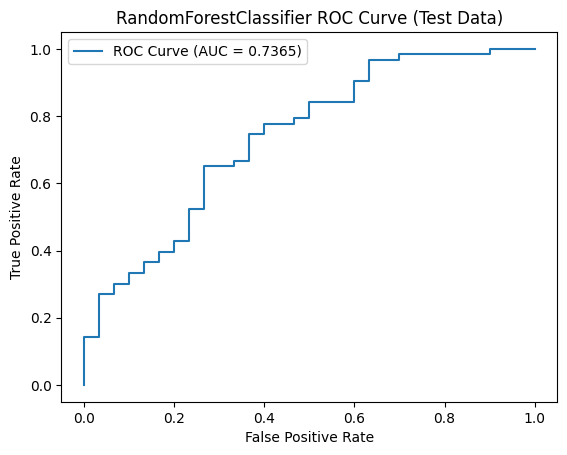

Model has been saved as 'random_forest_model.pkl'


In [ ]:
random_forest_tuned(X_train, X_val, X_test, y_train, y_val, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}

Evaluating LogisticRegression Model

Training Accuracy: 0.8205 (429 samples)
Training Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.43      0.59       127
           1       0.80      0.98      0.89       302

    accuracy                           0.82       429
   macro avg       0.86      0.71      0.74       429
weighted avg       0.84      0.82      0.80       429

Validation Accuracy: 0.8043 (92 samples)
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.49      0.65        35
           1       0.76      1.00      0.86        57

    accuracy                           0.80        92
   macro avg       0.88      0.74      0.76        92
weighted avg       0.85      0.80      0.78        92

Testing Accuracy: 0.7634 (93 samples)
Testing Classification Report:
               precision    

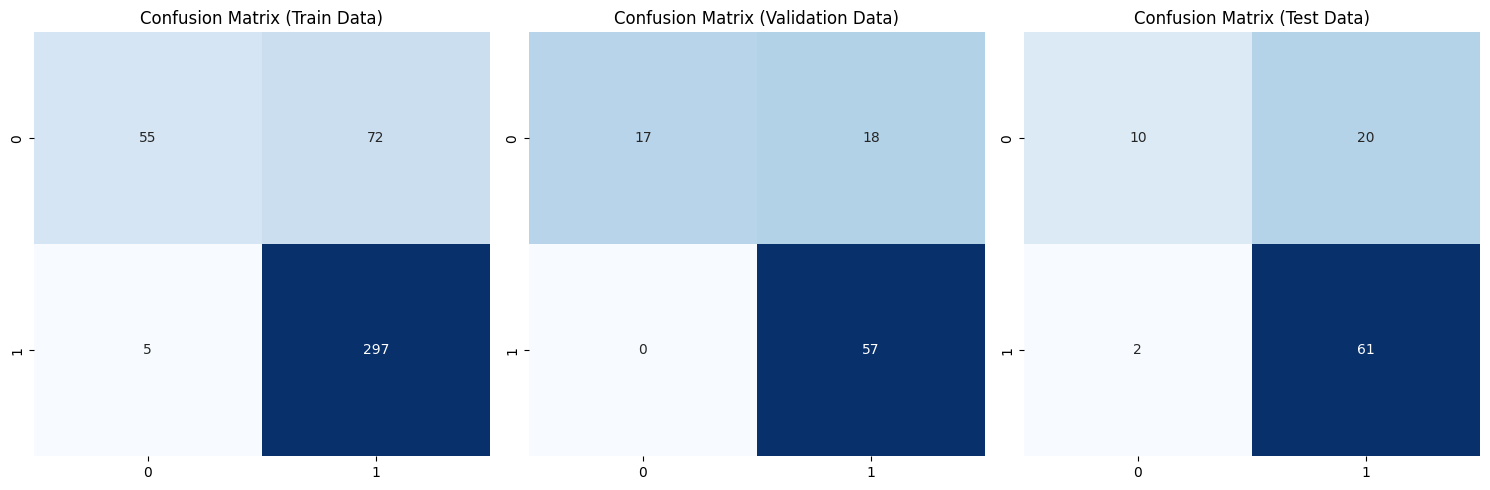

ROC AUC Score (Test Data): 0.7185


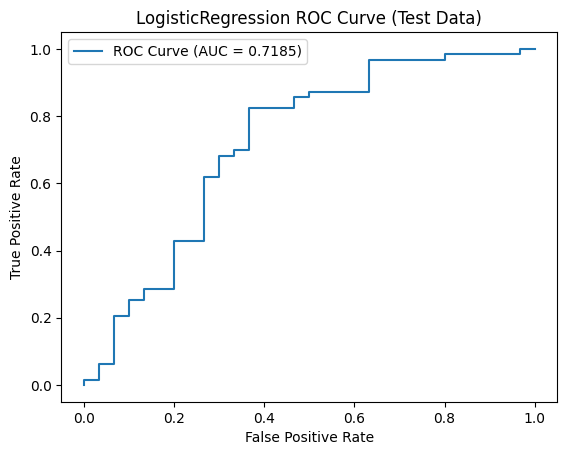

In [ ]:
logistic_regression_tuned(X_train, X_val, X_test, y_train, y_val, y_test)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

Evaluating DecisionTreeClassifier Model

Training Accuracy: 0.8252 (429 samples)
Training Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.43      0.59       127
           1       0.80      0.99      0.89       302

    accuracy                           0.83       429
   macro avg       0.88      0.71      0.74       429
weighted avg       0.85      0.83      0.80       429

Validation Accuracy: 0.7717 (92 samples)
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.40      0.57        35
           1       0.73      1.00      0.84        57

    accuracy                           0.77        92
   macro avg       0.87      0.70      0.71        92
weighted avg       0.83      0.77      0.74        92

Testing Accuracy: 0.7419 (93 samples)
Testing Classification Report:
     

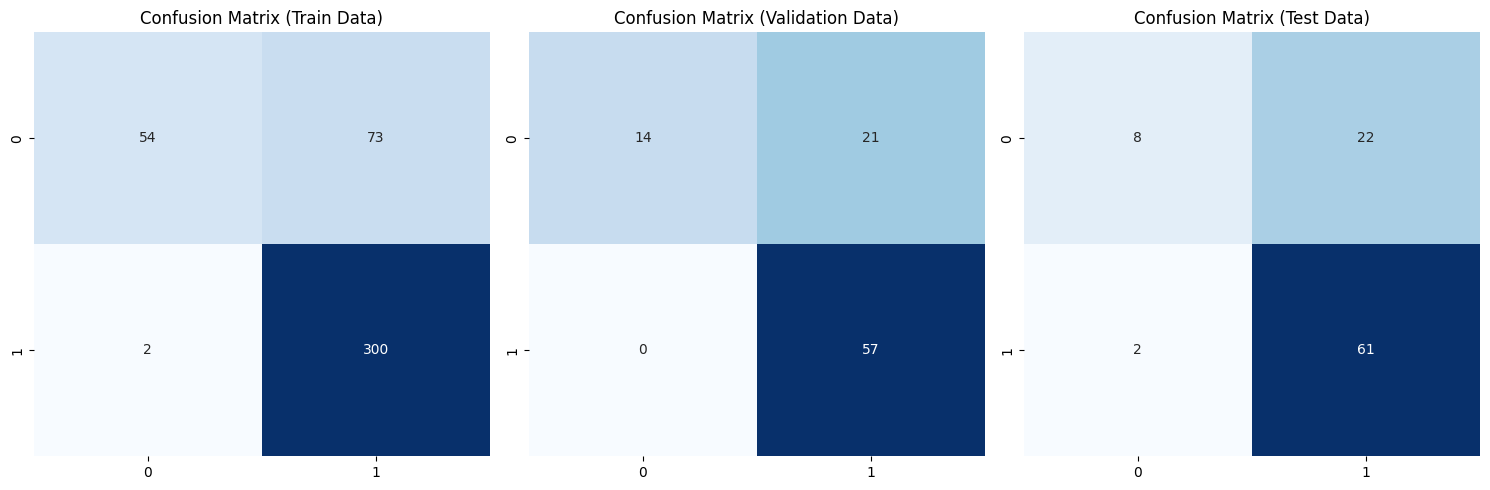

ROC AUC Score (Test Data): 0.7048


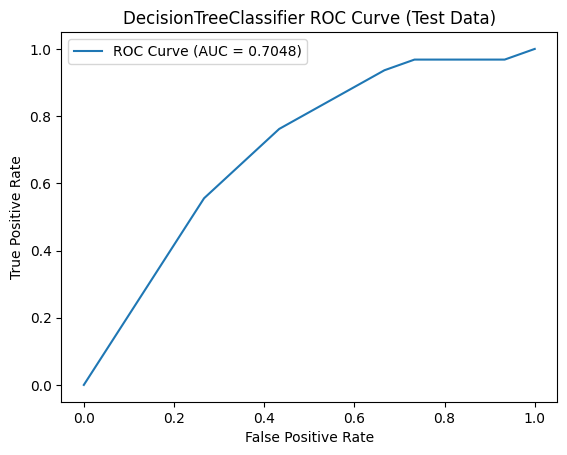

In [ ]:
decision_tree_tuned(X_train, X_val, X_test, y_train, y_val, y_test)

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

Evaluating SVC Model

Training Accuracy: 0.8205 (429 samples)
Training Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.43      0.59       127
           1       0.80      0.98      0.89       302

    accuracy                           0.82       429
   macro avg       0.86      0.71      0.74       429
weighted avg       0.84      0.82      0.80       429

Validation Accuracy: 0.8043 (92 samples)
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.49      0.65        35
           1       0.76      1.00      0.86        57

    accuracy                           0.80        92
   macro avg       0.88      0.74      0.76        92
weighted avg       0.85      0.80      0.78        92

Testing Accuracy: 0.7634 (93 samples)
Testing Classification Report:
               precision    recall  f1-

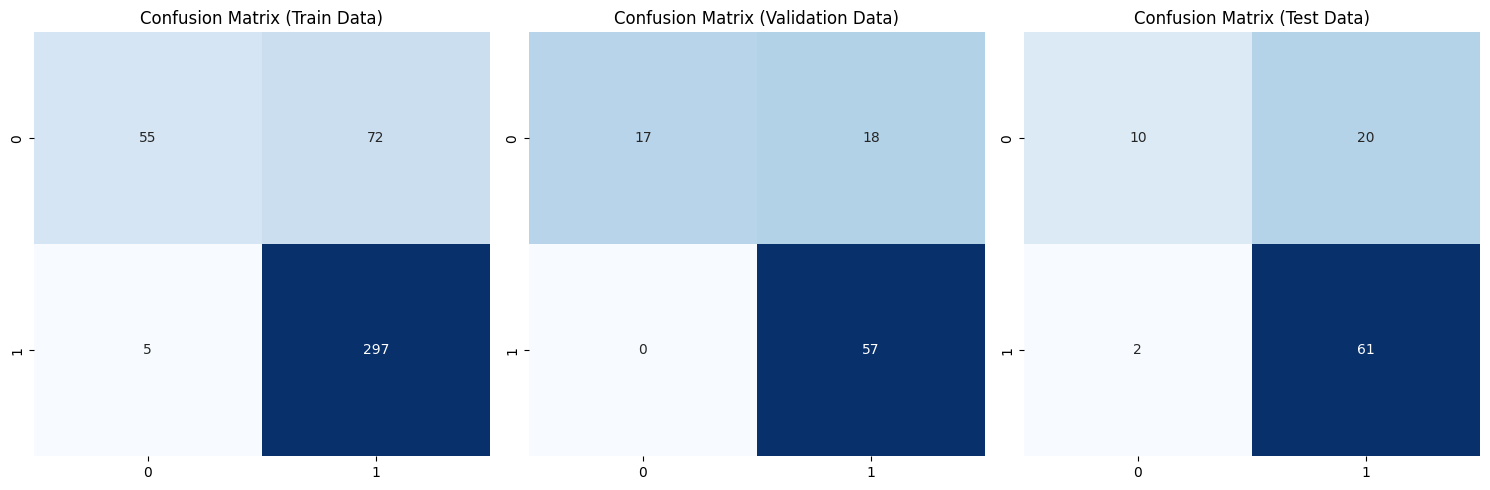

ROC AUC Score (Test Data): 0.7323


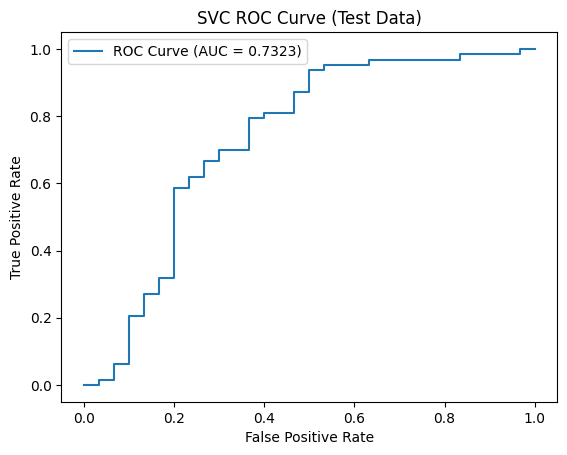

In [ ]:
svm_tuned(X_train, X_val, X_test, y_train, y_val, y_test)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

Evaluating KNeighborsClassifier Model

Training Accuracy: 1.0000 (429 samples)
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       302

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

Validation Accuracy: 0.7500 (92 samples)
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.46      0.58        35
           1       0.74      0.93      0.82        57

    accuracy                           0.75        92
   macro avg       0.77      0.69      0.70        92
weighted avg       0.76      0.75      0.73        92

Testing Accuracy: 0.6559 (93 samples)
Testing Classification Report:
        

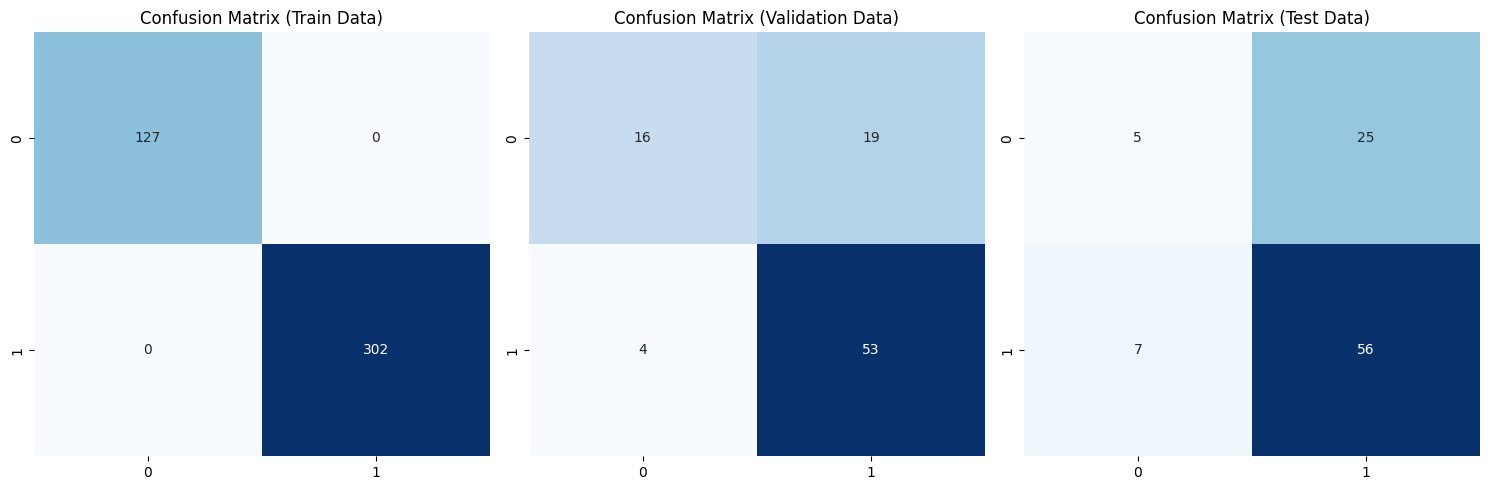

ROC AUC Score (Test Data): 0.6526


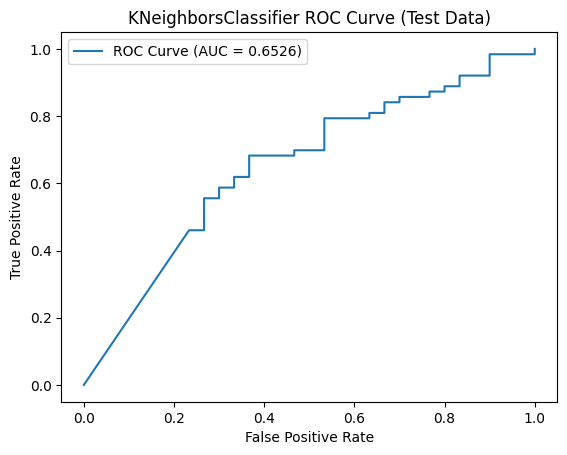

In [ ]:
knn_tuned(X_train, X_val, X_test, y_train, y_val, y_test)

Best Parameters: {'var_smoothing': 1e-09}

Evaluating GaussianNB Model

Training Accuracy: 0.8205 (429 samples)
Training Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.47      0.61       127
           1       0.81      0.97      0.88       302

    accuracy                           0.82       429
   macro avg       0.84      0.72      0.75       429
weighted avg       0.83      0.82      0.80       429

Validation Accuracy: 0.7935 (92 samples)
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.49      0.64        35
           1       0.76      0.98      0.85        57

    accuracy                           0.79        92
   macro avg       0.85      0.73      0.75        92
weighted avg       0.83      0.79      0.77        92

Testing Accuracy: 0.7742 (93 samples)
Testing Classification Report:
               precision    recall  f1-score   support



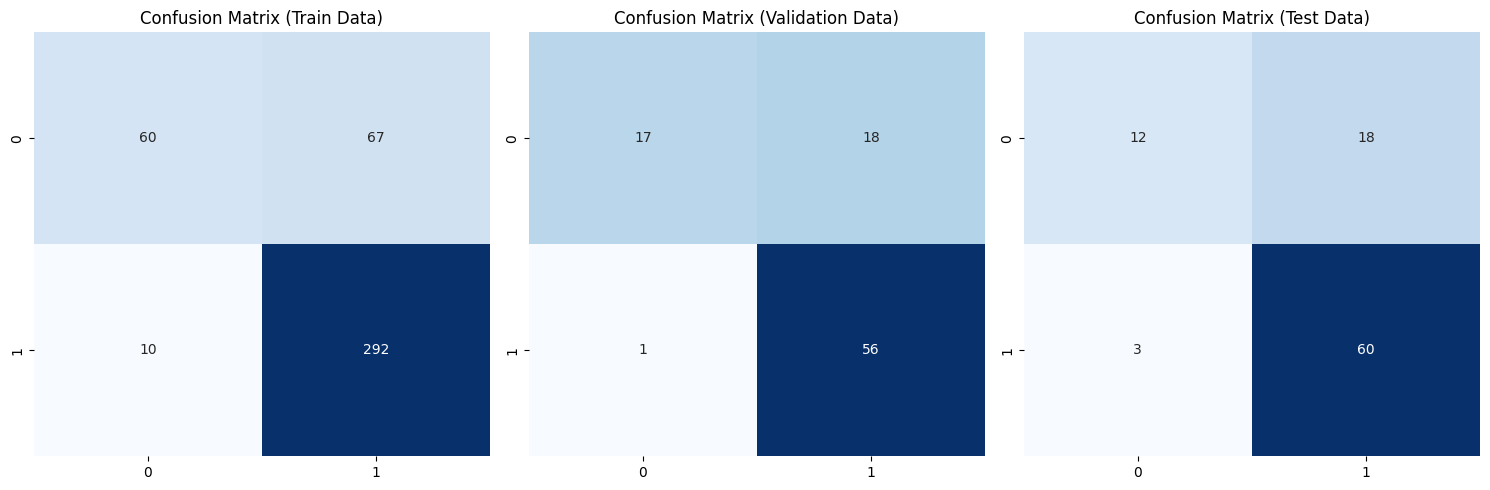

ROC AUC Score (Test Data): 0.7307


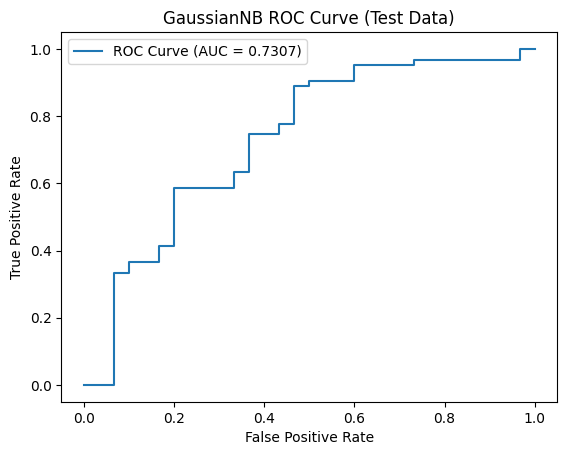

In [ ]:
naive_bayes_tuned(X_train, X_val, X_test, y_train, y_val, y_test)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Evaluating GradientBoostingClassifier Model

Training Accuracy: 0.8578 (429 samples)
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.53      0.69       127
           1       0.83      1.00      0.91       302

    accuracy                           0.86       429
   macro avg       0.91      0.76      0.80       429
weighted avg       0.88      0.86      0.84       429

Validation Accuracy: 0.7935 (92 samples)
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.46      0.63        35
           1       0.75      1.00      0.86        57

    accuracy                           0.79        92
   macro avg       0.88      0.73      0.74        92
weighted avg       0.85      0.79      0.77        92

Testing Accuracy: 0.7419 (93 samples)
Testing Classification Report:
      

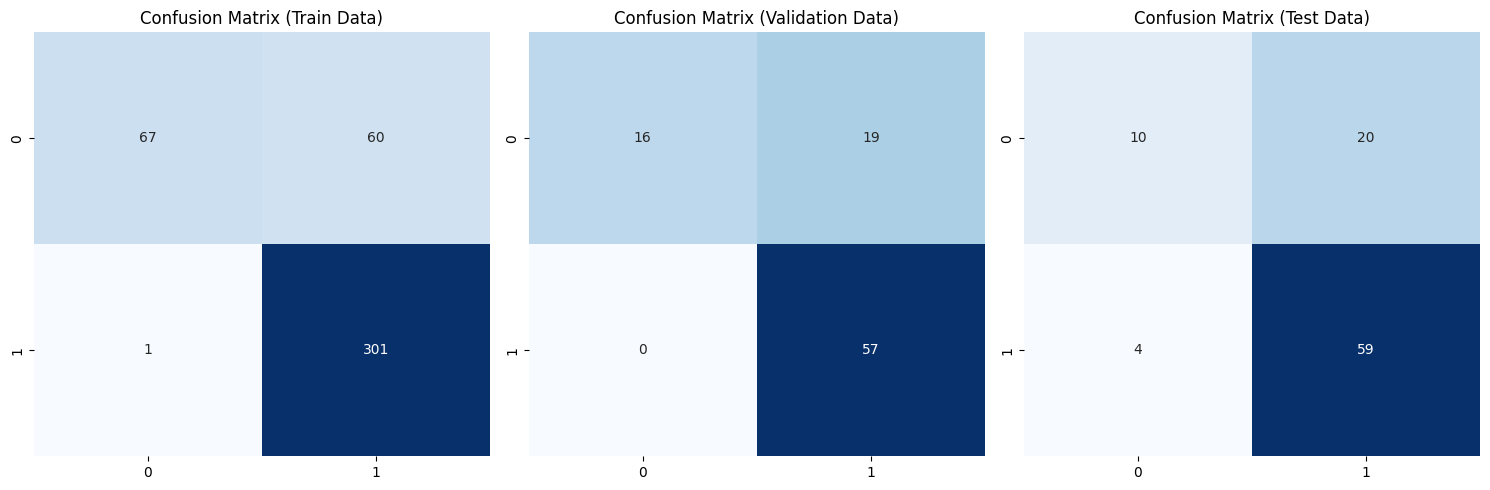

ROC AUC Score (Test Data): 0.6508


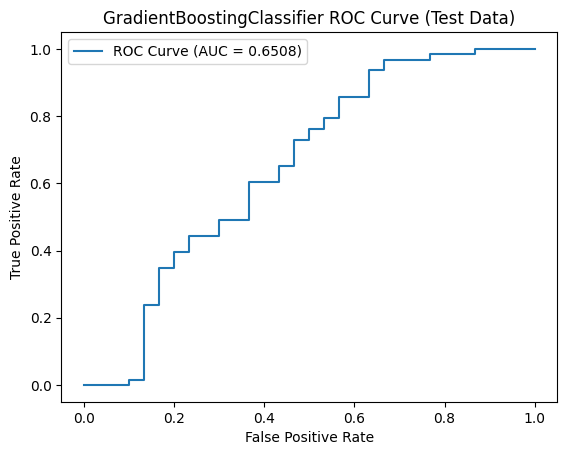

In [ ]:
gradient_boosting_tuned(X_train, X_val, X_test, y_train, y_val, y_test)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}

Evaluating AdaBoostClassifier Model

Training Accuracy: 0.8205 (429 samples)
Training Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.43      0.59       127
           1       0.80      0.98      0.89       302

    accuracy                           0.82       429
   macro avg       0.86      0.71      0.74       429
weighted avg       0.84      0.82      0.80       429

Validation Accuracy: 0.8043 (92 samples)
Validation Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.49      0.65        35
           1       0.76      1.00      0.86        57

    accuracy                           0.80        92
   macro avg       0.88      0.74      0.76        92
weighted avg       0.85      0.80      0.78        92

Testing Accuracy: 0.7634 (93 samples)
Testing Classification Report:
               precision    r

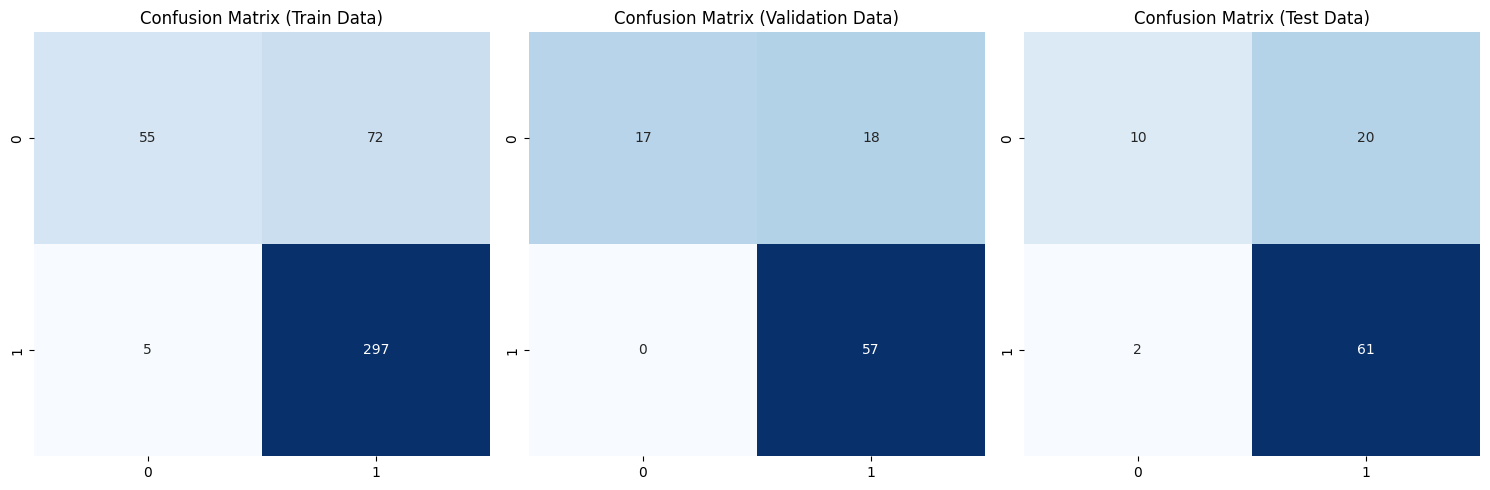

ROC AUC Score (Test Data): 0.6508


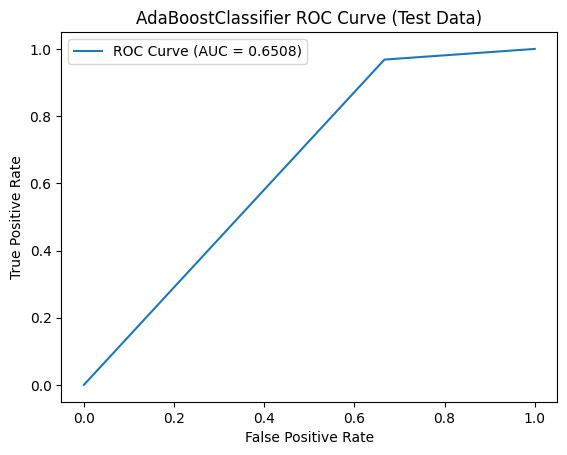

In [ ]:
adaboost_tuned(X_train, X_val, X_test, y_train, y_val, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (150,), 'max_iter': 300, 'solver': 'adam'}

Evaluating MLPClassifier Model

Training Accuracy: 0.7086 (429 samples)
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.03       127
           1       0.71      1.00      0.83       302

    accuracy                           0.71       429
   macro avg       0.85      0.51      0.43       429
weighted avg       0.79      0.71      0.59       429

Validation Accuracy: 0.6196 (92 samples)
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.62      1.00      0.77        57

    accuracy                           0.62        92
   macro avg       0.31      0.50      0.38        92
weighted avg       0.38      0.62      0.47        92

Testing Accuracy: 0.6774 (93 samples)
Testing Classificatio

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

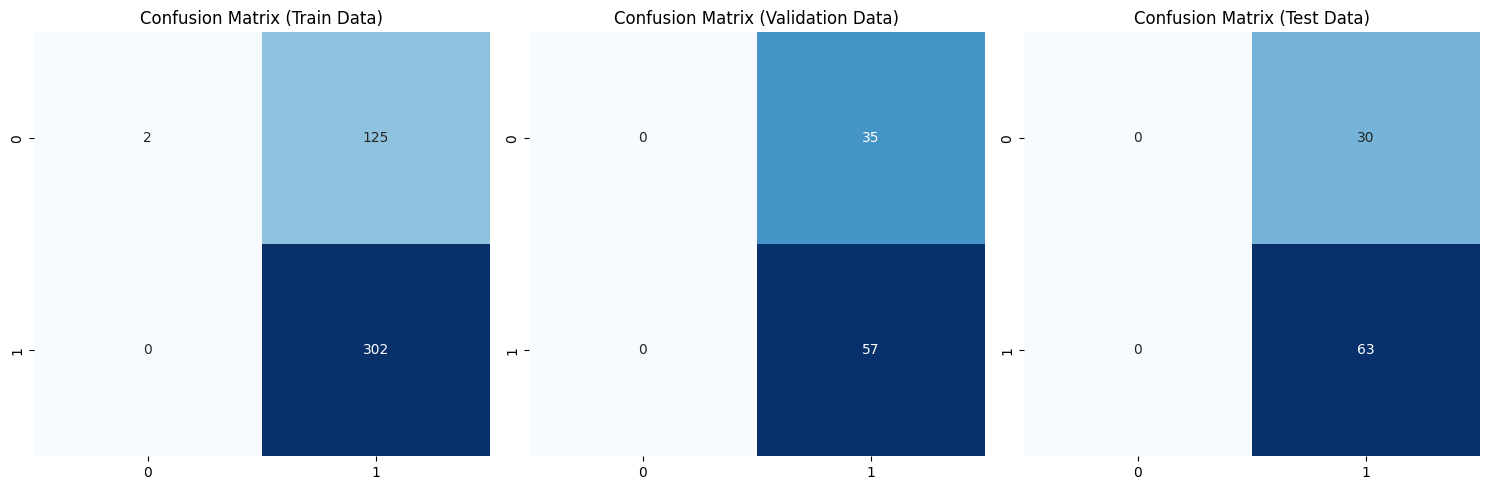

ROC AUC Score (Test Data): 0.6831


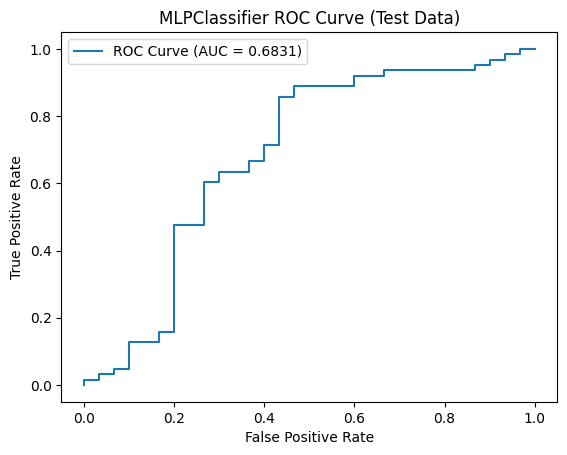

In [ ]:
mlp_tuned(X_train, X_val, X_test, y_train, y_val, y_test)